![Vanguard](datasets/vanguard.png) 
# ASSET BACKED SECURITIES - AUTO FINANCE LOANS

### What is an Asset-Backed Security
An asset-backed security (ABS) is a financial security collateralized by a pool of assets such as loans, leases, credit card debt, royalties or receivables. For investors, asset-backed securities are an alternative to investing in corporate debt. An ABS is similar to a mortgage-backed security, except that the underlying securities are not mortgage-based.

Asset-backed securities allow issuers to generate more cash, which, in turn, is used for more lending while giving investors the opportunity to invest in a wide variety of income-generating assets. Usually, the underlying assets of an ABS are illiquid and can't be sold on their own. But pooling the assets together and creating a financial security, a process called securitization, enables the owner of the assets to make them marketable. The underlying assets of these pools may be home equity loans, automobile loans, credit card receivables, student loans or other expected cash flows. Issuers of ABS can be as creative as they desire. For example, ABS have been created based on cash flows from movie revenues, royalty payments, aircraft leases and solar photovoltaics. Just about any cash-producing situation can be securitized into an ABS.

### Example of Asset-Backed Security
Assume that Company X is in the business of making automobile loans. If a person wants to borrow money to buy a car, Company X gives that person the cash, and the person is obligated to repay the loan with a certain amount of interest. Perhaps Company X makes so many loans that it runs out of cash to continue making more loans. Company X can then package its current loans and sell them to Investment Firm X, thus receiving cash that it can use to make more loans.

Investment Firm X will then sort the purchased loans into different groups called tranches. These tranches are groups of loans with similar characteristics, such as maturity, interest rate and expected delinquency rate. Next, Investment Firm X will issue securities that are similar to typical bonds on each tranche it creates.

Individual investors then purchase these securities and receive the cash-flows from the underlying pool of auto loans, minus an administrative fee that Investment Firm X keeps for itself.

### Typical Tranches
Usually an ABS will have three tranches: class A, B and C. The senior tranche, A, is almost always the largest tranche and is structured to have an investment-grade rating to make it attractive to investors.

The B tranche has lower credit quality and thus has a higher yield than the senior tranche. The C tranche has a lower credit rating than the B tranche and might have such poor credit quality that it can't be sold to investors. In this case, the issuer would keep the C tranche and absorb the losses.


### Vanguard Use Case 
To predict loan default based on public data from SEC and additional economic data

![Auto Loans](datasets/saupload_US-auto-loans-2017-Q1.png)

### Import Libraries

In [1]:
import re
import time
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras import optimizers
from keras.models import Sequential
from keras.layers import Input, Dense, Dropout, LSTM, GRU
from keras.models import Model, load_model
from keras.callbacks import ModelCheckpoint, TensorBoard
from keras import regularizers
tf.__version__
%matplotlib inline

import seaborn as sns
import itertools
import operator
import collections
from scipy.io import mmread, mmwrite
from random import randint
from sklearn import linear_model
from sklearn.grid_search import GridSearchCV
from sklearn import preprocessing as pp
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.decomposition import PCA, KernelPCA
from sklearn.decomposition import NMF
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression, Ridge, Lasso, ElasticNet
import scipy.stats as stats
from sklearn import tree
from sklearn.feature_selection import f_regression
from sklearn.gaussian_process import GaussianProcess
from sklearn.metrics import roc_auc_score
from sklearn import metrics

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_recall_curve
from sklearn.metrics import recall_score, classification_report, auc, roc_curve
from sklearn.metrics import precision_recall_fscore_support, f1_score
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

Using TensorFlow backend.
C:\Progra~1\Anaconda3_4\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Progra~1\Anaconda3_4\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


### Model Name

In [2]:
name = "ABS_Keras-GRU254GRU128D32D2-adam{}".format(int(time.time()))
#name_noTime = "ABS_Keras-LSTM128LSTM128D32D2-adam"

### Default Parameters

In [3]:
#parameters to choose
default_days = 0
nrows = 250_000
train_split = 0.80
model_type = 'scikit-learn'
path = 'c:/users/ugy1/abs/'
rows_for_prediction = 1000
cutOffForOriginationDate='2012-01-01'
manualOversamplingFactor=0.0
epochs=1

### Features to Be Used from Data

In [4]:
# columns to be used
use_list=[
    'abs_loan.cik',
 #'abs_loan.accessionnumber',
 #'abs_loan.assettypenumber',
 'abs_loan.assetnumber',
 'abs_loan.reportingperiodbeginningdate',
 'abs_loan.reportingperiodendingdate',
 'abs_loan.originatorname',
 'abs_loan.originationdate',
 'abs_loan.originalloanamount',
 'abs_loan.originalloanterm',
 'abs_loan.loanmaturitydate',
 'abs_loan.originalinterestratepercentage',
 #'interestcalculationtypecode',
 #'originalinterestratetypecode',
 #'originalinterestonlytermnumber',
 'abs_loan.originalfirstpaymentdate',
 'abs_loan.underwritingindicator',
 'abs_loan.graceperiodnumber',
 #'paymenttypecode',
 'abs_loan.subvented',
 #'vehiclemanufacturername',
 #'vehiclemodelname',
 'abs_loan.vehiclenewusedcode',
 #'vehiclemodelyear',
 'abs_loan.vehicletypecode',
 #'vehiclevalueamount',
 #'vehiclevaluesourcecode',
 'abs_loan.obligorcreditscoretype',
 'abs_loan.obligorcreditscore',
 'abs_loan.obligorincomeverificationlevelcode',
 'abs_loan.obligoremploymentverificationcode',
 'abs_loan.coobligorindicator',
 'abs_loan.paymenttoincomepercentage',
 #'obligorgeographiclocation',
 'abs_loan.assetaddedindicator',
 #'remainingtermtomaturitynumber',
 'abs_loan.reportingperiodmodificationindicator',
 'abs_loan.servicingadvancemethodcode',
 'abs_loan.reportingperiodbeginningloanbalanceamount',
 'abs_loan.nextreportingperiodpaymentamountdue',
 'abs_loan.reportingperiodinterestratepercentage',
 'abs_loan.nextinterestratepercentage',
 'abs_loan.servicingfeepercentage',
 'abs_loan.servicingflatfeeamount',
 'abs_loan.otherservicerfeeretainedbyservicer',
 'abs_loan.otherassesseduncollectedservicerfeeamount',
 'abs_loan.scheduledinterestamount',
 'abs_loan.scheduledprincipalamount',
 'abs_loan.otherprincipaladjustmentamount',
 'abs_loan.reportingperiodactualendbalanceamount',
 'abs_loan.reportingperiodscheduledpaymentamount',
 'abs_loan.totalactualamountpaid',
 'abs_loan.actualinterestcollectedamount',
 'abs_loan.actualprincipalcollectedamount',
 'abs_loan.actualothercollectedamount',
 'abs_loan.serviceradvancedamount',
 'abs_loan.interestpaidthroughdate',
 'abs_loan.zerobalanceeffectivedate',
 'abs_loan.zerobalancecode',
 'abs_loan.currentdelinquencystatus',
 #'primaryloanservicername',
 #'mostrecentservicingtransferreceiveddate',
 #'assetsubjectdemandindicator',
 #'assetsubjectdemandstatuscode',
 #'repurchaseamount',
 #'demandresolutiondate',
 #'repurchasername',
 #'repurchasereplacementreasoncode',
 #'chargedoffprincipalamount',
 #'recoveredamount',
 #'modificationtypecode',
 #'paymentextendednumber',
 #'repossessedindicator',
 #'repossessedproceedsamount'
]

### GPU Options

In [5]:
#set gpu options to adjust gpu usage
# gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=0.5)
# sess=tf.Session(config=tf.ConfigProto(gpu_options=gpu_options))

### Load data

In [6]:
#load data from tab delimited file
df=pd.read_csv(path+'datasets/abs_loan.csv', 
               usecols=use_list, 
               sep='\t',
               #compression=bz2,
               nrows=nrows,
               low_memory=False, 
              #index_col='abs_loan.reportingperiodendingdate', 
               parse_dates=True
              )

#remove 'abs_loan.' string from columns because 'dot' is a command in pandas
df.columns=df.columns.str.replace('abs_loan.','')

#display data shape
print(df.shape)
#view first five rows of all columns
#df.head(n=5)

(250000, 47)


### Analyse and Delete Duplicate Data

In [7]:
#df.cik.unique()

In [8]:
#df.assetnumber.unique()

In [9]:
#df.loc[:,~df.columns.str.contains('^Unnamed')]

In [10]:
#df.duplicated(subset=['cik','assetnumber']).sum()

In [11]:
#df.duplicated(subset=['cik','assetnumber','reportingperiodendingdate']).sum()

In [12]:
df.duplicated(subset=['cik','assetnumber','reportingperiodendingdate','originationdate']).sum()

0

In [13]:
#df.loc[df.duplicated(subset=['cik','assetnumber','reportingperiodendingdate']),:]

In [14]:
df.duplicated().sum()

0

In [15]:
df.drop_duplicates(subset=['cik','assetnumber','reportingperiodendingdate','originationdate'],keep='last', inplace=True)

In [16]:
#df.columns.tolist()
df.shape

(250000, 47)

### Dataframe Memory Usage and Datatypes

In [17]:
#df.info(memory_usage='deep')

In [18]:
df.memory_usage(deep=True).sum()

242995004

In [19]:
df.dtypes

cik                                            int64
assetnumber                                    int64
reportingperiodbeginningdate                  object
reportingperiodendingdate                     object
originatorname                                object
originationdate                               object
originalloanamount                           float64
originalloanterm                               int64
loanmaturitydate                              object
originalinterestratepercentage               float64
originalfirstpaymentdate                      object
underwritingindicator                           bool
graceperiodnumber                              int64
subvented                                     object
vehiclenewusedcode                             int64
vehicletypecode                                int64
obligorcreditscoretype                        object
obligorcreditscore                             int64
obligorincomeverificationlevelcode            

In [20]:
#df.head()
#df=df.sort_values(by='originationdate', ascending=True)

### Function to Draw Bar chart

In [21]:
#function to draw a bar chart 
def draw(data, title, ylabel, sort = False, n=-1):
    labels = pd.value_counts(data).head().index.tolist()
    count_classes = pd.value_counts(data, sort).head()
    count_classes.plot(kind = 'bar', rot=0)
    plt.xticks(range(len(labels)), labels)
    plt.title(title)
    plt.ylabel(ylabel)
    plt.show()
    print('Top ',n,' counts: ','\n',pd.value_counts(data, sort).head(n))

### Reporting Period
we have taken reportingperiodendingdate as a proxy for the reporting period

Missing values in the reporting period

In [22]:
df.reportingperiodendingdate.isna().mean()

0.0

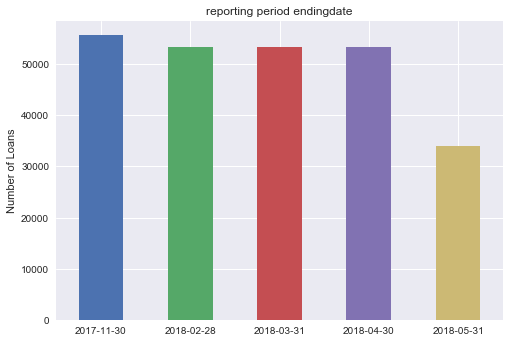

Top  -1  counts:  
 2017-11-30    55710
2018-02-28    53447
2018-03-31    53443
2018-04-30    53442
Name: reportingperiodendingdate, dtype: int64


In [23]:
draw(df.reportingperiodendingdate, title='reporting period endingdate', ylabel='Number of Loans', sort = True)

In [24]:
# restrict data to a reporting period
#df=df[df.index=='2017-11-30']

### Mean current deliquency days for the reporting period

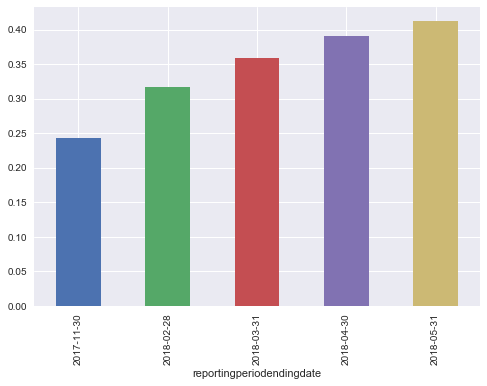

In [25]:
df.groupby(df.reportingperiodendingdate).currentdelinquencystatus.mean().plot(kind='bar')

### Mean reporting period ending balance

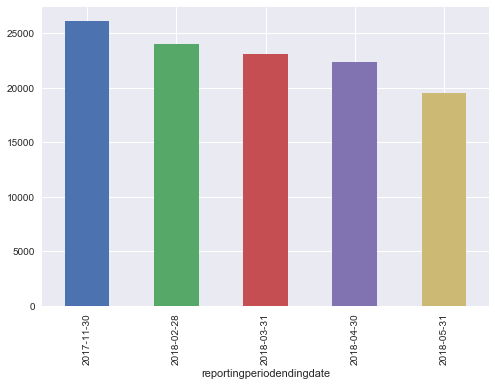

In [26]:
df.groupby(df.reportingperiodendingdate).reportingperiodactualendbalanceamount.mean().plot(kind='bar')

### Actual end balance amount for all current deliquency status days by reporting period

reportingperiodendingdate
2017-11-30    Axes(0.125,0.125;0.775x0.755)
2018-02-28    Axes(0.125,0.125;0.775x0.755)
2018-03-31    Axes(0.125,0.125;0.775x0.755)
2018-04-30    Axes(0.125,0.125;0.775x0.755)
2018-05-31    Axes(0.125,0.125;0.775x0.755)
dtype: object

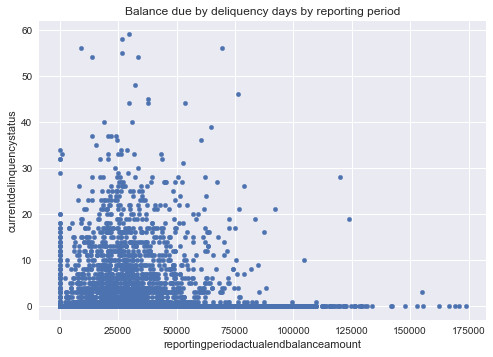

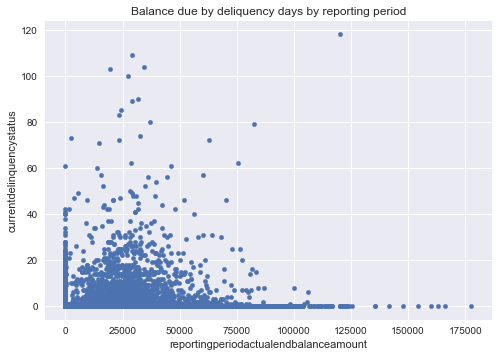

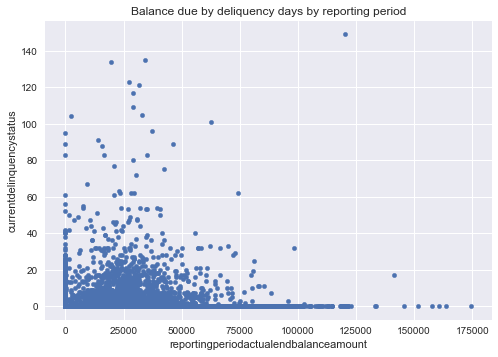

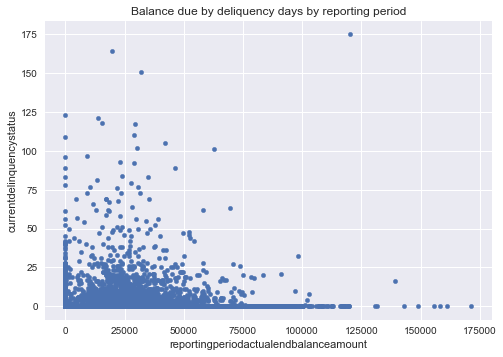

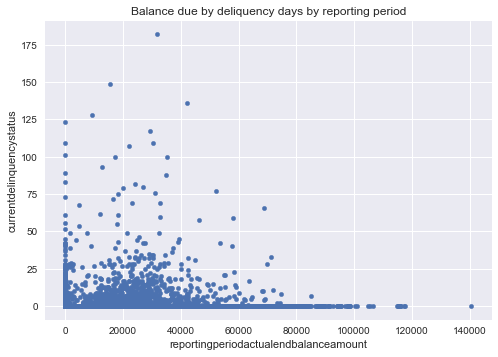

In [27]:
df.groupby(df.reportingperiodendingdate).plot(kind='scatter', x='reportingperiodactualendbalanceamount',y='currentdelinquencystatus', title='Balance due by deliquency days by reporting period')

### Creating Feature columns for Reporting period

In [28]:
# create feature columns for categories within originator name 
def map_reportingperiodendingdate(*args):
    columns = [col for col in args]
    for column in columns:
        if column == code:
            return 1
        else:
            return 0
codes = pd.value_counts(df.reportingperiodendingdate).index.tolist()

for code in codes:
        df['reportingperiodending_{}'.format(code)] = list(map(map_reportingperiodendingdate, df.reportingperiodendingdate))
        print('Added Column for :   reportingperiodending_'+code)
print('New Dataframe shape : ', df.shape)

Added Column for :   reportingperiodending_2017-11-30
Added Column for :   reportingperiodending_2018-02-28
Added Column for :   reportingperiodending_2018-03-31
Added Column for :   reportingperiodending_2018-04-30
Added Column for :   reportingperiodending_2018-05-31
New Dataframe shape :  (250000, 52)


### Calculating Number of Days Loans Outstanding and creating a feature column

In [29]:
#calculate outstanding days
df['outstandingdays'] = pd.to_datetime(df['reportingperiodendingdate'])-pd.to_datetime(df['originationdate'])
#draw a chart for visual look and analysis
#draw(df.outstandingdays, title='Outstanding Days', ylabel='Number of Loans', sort = True, n=5)
#remove days string for machine learning
df['outstandingdays']=df.outstandingdays.map(lambda x: np.nan if pd.isnull(x) else x.days)
#display last five rows
#df.outstandingdays.tail()

### current deliquency status days Vs Loan Outstanding days by the reporting period

reportingperiodendingdate
2017-11-30    Axes(0.125,0.125;0.775x0.755)
2018-02-28    Axes(0.125,0.125;0.775x0.755)
2018-03-31    Axes(0.125,0.125;0.775x0.755)
2018-04-30    Axes(0.125,0.125;0.775x0.755)
2018-05-31    Axes(0.125,0.125;0.775x0.755)
dtype: object

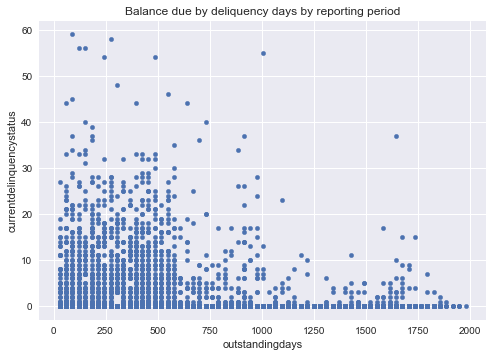

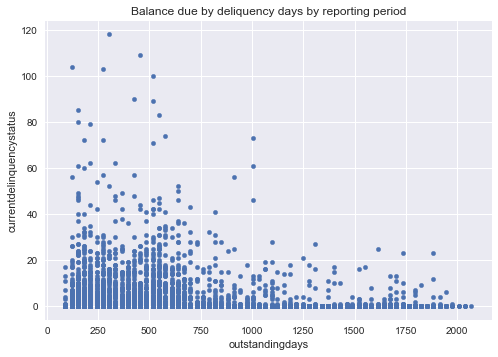

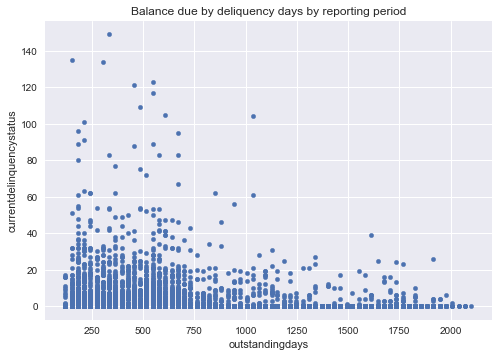

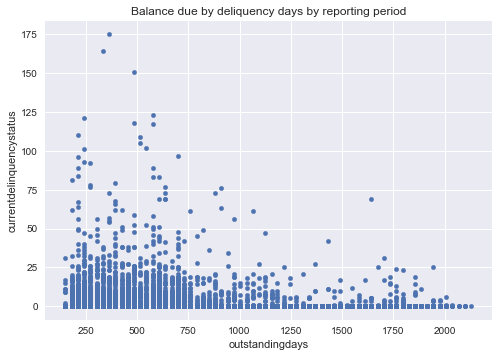

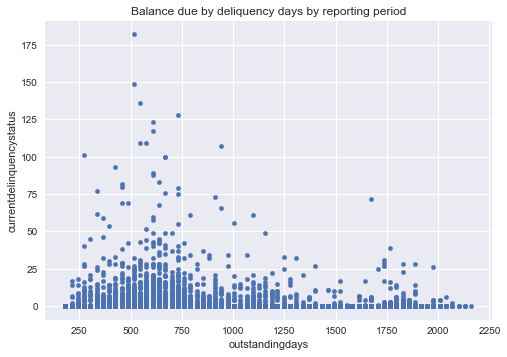

In [30]:
df.groupby(df.reportingperiodendingdate).plot(kind='scatter', x='outstandingdays',y='currentdelinquencystatus', title='Balance due by deliquency days by reporting period')

### Dropping Loans Below Zero Outstanding Days

In [31]:
# retaining only loans with non-negative outstanding days
u=pd.value_counts(df.outstandingdays<0)
if len(u)<2:
    print('No Loans Below zero outstanding days')
else: 
    print('Number of Loans with negative outstanding days :', u[1])
    print('Dropping ', u[1], 'rows and retaining loans with only non-negative outstanding days')
    df=df[df.outstandingdays>0]

No Loans Below zero outstanding days


In [32]:
# get statistics for outstanding days
df.outstandingdays.describe()

count    250000.000000
mean        509.646540
std         336.996325
min          30.000000
25%         274.000000
50%         456.000000
75%         608.000000
max        2161.000000
Name: outstandingdays, dtype: float64

### Mean outstanding days for the reporting period

In [33]:
df.groupby(df.reportingperiodendingdate).outstandingdays.mean()

reportingperiodendingdate
2017-11-30    397.635810
2018-02-28    477.020319
2018-03-31    508.027637
2018-04-30    538.032596
2018-05-31    702.632075
Name: outstandingdays, dtype: float64

### Calculate Number of Days Left until Maturity

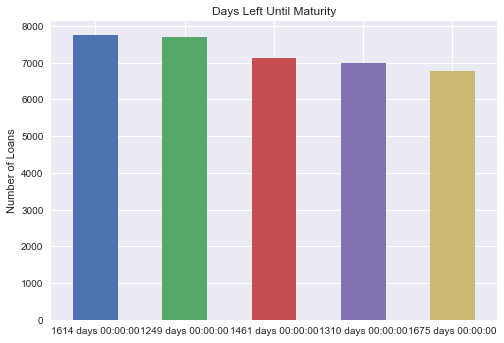

Top  5  counts:  
 1614 days    7753
1249 days    7695
1461 days    7139
1310 days    7003
1675 days    6785
Name: daystomaturity, dtype: int64


In [34]:
#calculate days left until maturity
df['daystomaturity'] = pd.to_datetime(df['loanmaturitydate'])-pd.to_datetime(df['reportingperiodendingdate'])
draw(df.daystomaturity, title='Days Left Until Maturity', ylabel='Number of Loans', sort=True, n=5)

### Create Feature Column for Days to Maturity

In [35]:
# remove 'days' string from the data for machine learning
df['daystomaturity']=df.daystomaturity.map(lambda x: np.nan if pd.isnull(x) else x.days)
# print last five rows
df.daystomaturity.tail()

249995    1279
249996     579
249997    1279
249998    1675
249999    1310
Name: daystomaturity, dtype: int64

In [36]:
#retaining only loans with non-negative days to maturity
u=pd.value_counts(df.daystomaturity<=0)
if len(u)<2:
    print('No Loans Below zero outstanding days')
else: 
    print('Number of Loans with negative outstanding days :', u[1])
    print('Dropping ', u[1], 'rows and retaining loans with only non-negative outstanding days')
    df=df[df.daystomaturity>0]
#number of rows and columns of the dataframe
df.shape

Number of Loans with negative outstanding days : 242
Dropping  242 rows and retaining loans with only non-negative outstanding days


(249758, 54)

In [37]:
# statistics for days to maturity
df.daystomaturity.describe()

count    249758.000000
mean       1372.644168
std         436.948904
min          30.000000
25%        1188.000000
50%        1431.000000
75%        1673.000000
max        2191.000000
Name: daystomaturity, dtype: float64

### Outstandingdays Vs Days to maturity

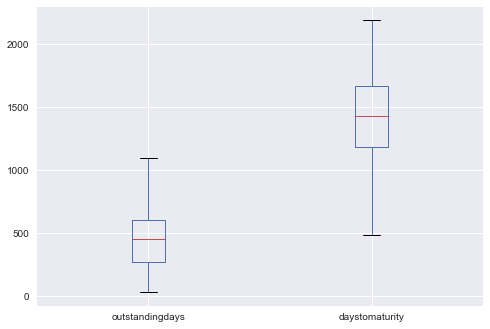

In [38]:
df[['outstandingdays', 'daystomaturity']].boxplot()

### Mean Number of days to Maturity for the Reporting Period

In [39]:
df.groupby(df.reportingperiodendingdate).daystomaturity.mean()

reportingperiodendingdate
2017-11-30    1482.041537
2018-02-28    1402.865905
2018-03-31    1371.912991
2018-04-30    1341.950058
2018-05-31    1193.786718
Name: daystomaturity, dtype: float64

In [40]:
df.drop(['loanmaturitydate'], axis=1, inplace=True)

### Origination Date - Removing loans before origination cutoff date

In [41]:
# remove loans with orgination dates set for cut off earlier
u=pd.value_counts(df.originationdate<=cutOffForOriginationDate)
if len(u)<2:
    print('No origination date rows fall before ',cutOffForOriginationDate )
else: 
    print('Number of rows before',cutOffForOriginationDate ,':', u[1])
    print('Dropping ', u[1], 'rows and retaining loans with origination dates after', cutOffForOriginationDate)
    df=df[df.originationdate>cutOffForOriginationDate]
#new number of rows and columns of the dataframe
df.shape

No origination date rows fall before  2012-01-01


(249758, 53)

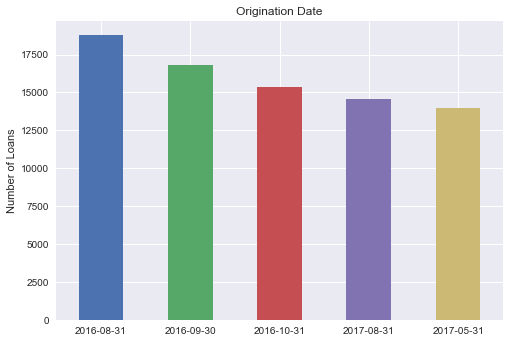

Top  10  counts:  
 2016-08-31    18784
2016-09-30    16833
2016-10-31    15331
2017-08-31    14544
2017-05-31    13959
2017-09-30    13274
2016-12-31    11466
2017-04-30    10748
2016-07-31    10664
2017-07-31    10437
Name: originationdate, dtype: int64


In [42]:
#set origination date as index
#df.set_index(['originationdate'])
# draw origination date chart
draw(df.originationdate, title='Origination Date', ylabel='Number of Loans', sort=True, n=10)

In [43]:
# statistics for origination date
df.originationdate.describe()

count         249758
unique            66
top       2016-08-31
freq           18784
Name: originationdate, dtype: object

### Top ten mean current deliquency status by origination date and reporting period

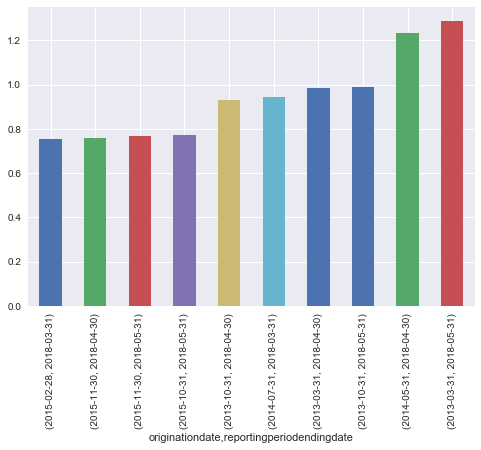

In [44]:
df.groupby([df.originationdate, df.reportingperiodendingdate]).currentdelinquencystatus.mean().sort_values().tail(n=10).plot(kind='bar')

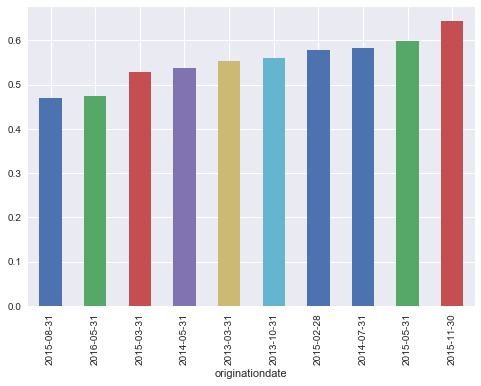

In [45]:
df.groupby(df.originationdate).currentdelinquencystatus.mean().sort_values().tail(n=10).plot(kind='bar')

### Originators Name

In [46]:
df.originatorname.unique()

array(['BMW Bank of North America', 'BMW Financial Services NA LLC'], dtype=object)

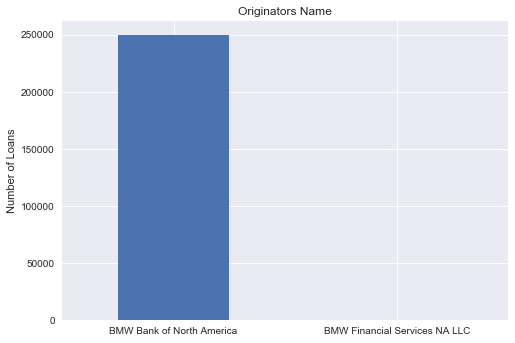

Top  -1  counts:  
 BMW Bank of North America    249544
Name: originatorname, dtype: int64


In [47]:
# draw charts for originators name
draw(df.originatorname, title='Originators Name', ylabel='Number of Loans', sort=True)

### Create Features for Originators

In [48]:
df['originatorname']=df.originatorname.astype('category')

In [49]:
df.originatorname.isnull().sum()

0

In [50]:
df.groupby(df.originatorname).currentdelinquencystatus.mean()

originatorname
BMW Bank of North America        0.337788
BMW Financial Services NA LLC    0.514019
Name: currentdelinquencystatus, dtype: float64

In [51]:
# create feature columns for categories within originator name 
def map_originatorname(*args):
    columns = [col for col in args]
    for column in columns:
        if column == code:
            return 1
        else:
            return 0
codes = pd.value_counts(df.originatorname).index.tolist()

for code in codes:
        df['originator_{}'.format(code)] = list(map(map_originatorname, df.originatorname))
        print('Added Column for :   originator_'+code)
print('New Dataframe shape : ', df.shape)

Added Column for :   originator_BMW Bank of North America
Added Column for :   originator_BMW Financial Services NA LLC
New Dataframe shape :  (249758, 55)


In [52]:
# drop originator name column
df.drop(['originatorname'],axis=1, inplace=True)
# new number of rows and columns
df.shape

(249758, 54)

### Original Loan Amount

In [53]:
df.groupby(df.reportingperiodendingdate).originalloanamount.mean()


reportingperiodendingdate
2017-11-30    33782.069528
2018-02-28    33735.256720
2018-03-31    33735.493345
2018-04-30    33735.104943
2018-05-31    34064.918967
Name: originalloanamount, dtype: float64

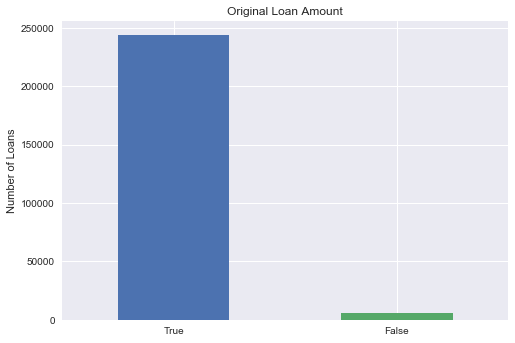

Top  -1  counts:  
 True    243674
Name: originalloanamount, dtype: int64


In [54]:
# draw chart for original loan amount as filered in the next variable(original_loan_in_excess) 
original_loan_in_excess = 10000
draw(df.originalloanamount>original_loan_in_excess, title='Original Loan Amount', ylabel='Number of Loans', sort=True)

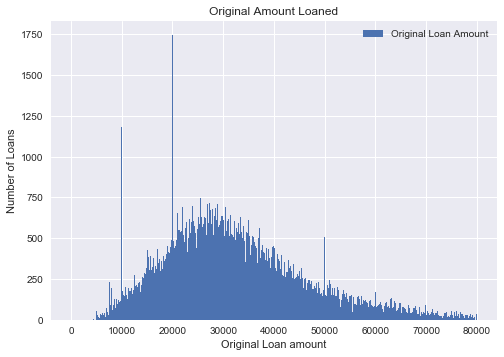

In [55]:
#draw a chart to view distribution of original loan amount
bins = np.linspace(0, 80000, 1000)
plt.hist(df.originalloanamount, bins, label='Original Loan Amount')
plt.legend(loc='upper right')
plt.title("Original Amount Loaned")
plt.xlabel('Original Loan amount')
plt.ylabel('Number of Loans')
plt.show()

In [56]:
# get statistics for original loan amount
df.originalloanamount.describe()

count    249758.000000
mean      33790.219398
std       16407.610650
min        3741.290000
25%       22723.030000
50%       30848.250000
75%       41362.640000
max      189984.120000
Name: originalloanamount, dtype: float64

### Remove Original Loan Amount Below Zero

In [57]:
# To remove rows with zero, non-negative or blank values for original loan amount

u=pd.value_counts(df.originalloanamount<=0)
if len(u)<2:
    print('No original loan amount blank or below zero')
else: 
    print('Number of original loan amount rows blank or below zero',':', u[1])
    print('Dropping ', u[1], 'rows and retaining loans with original loan amount more than zero')
    df=df[df.originalloanamount>0]
df.shape

No original loan amount blank or below zero


(249758, 54)

### Original Loan Term

In [58]:
df.groupby(df.reportingperiodendingdate).originalloanterm.mean()

reportingperiodendingdate
2017-11-30    61.347819
2018-02-28    61.352106
2018-03-31    61.352656
2018-04-30    61.352681
2018-05-31    61.685520
Name: originalloanterm, dtype: float64

In [59]:
#check for NaN
df.originalloanterm.isna().mean()

0.0

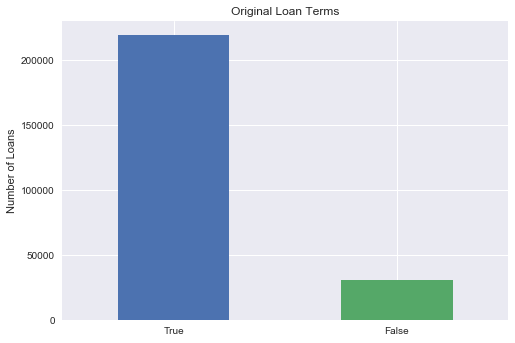

Top  -1  counts:  
 True    219067
Name: originalloanterm, dtype: int64


In [60]:
# draw chart for original loan term based on the input of variable below(original_loan_term_excess)
original_loan_term_excess = 48
draw(df.originalloanterm>original_loan_term_excess, title='Original Loan Terms', ylabel='Number of Loans',sort=True)

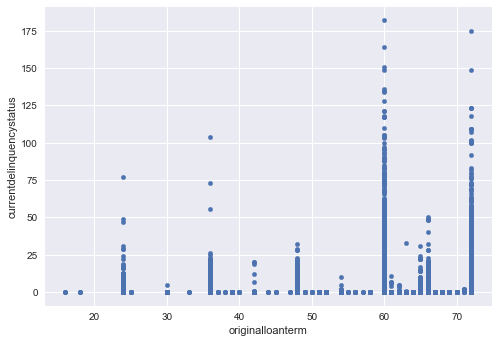

In [61]:
df.plot(kind='scatter', x='originalloanterm', y='currentdelinquencystatus')

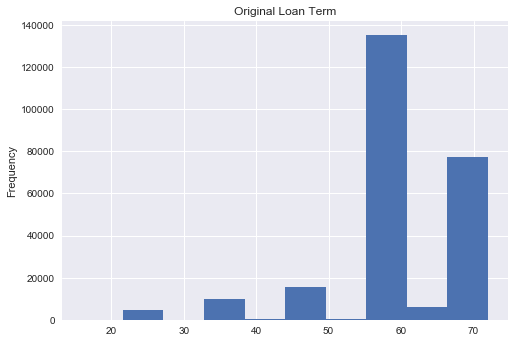

In [62]:
df.originalloanterm.plot(kind='hist', bins=10, title='Original Loan Term')

In [63]:
#statistics for original loan term
df.originalloanterm.describe()

count    249758.000000
mean         61.396400
std          10.058139
min          16.000000
25%          60.000000
50%          60.000000
75%          72.000000
max          72.000000
Name: originalloanterm, dtype: float64

In [64]:
# remove rows with zero, blank or negative original loan term

u=pd.value_counts(df.originalloanterm<=0)
if len(u)<2:
    print('No original loan term blank or below zero')
else: 
    print('Number of original loan term rows blank or below zero',':', u[1])
    print('Dropping ', u[1], 'rows and retaining loans with original loan term more than zero')
    df=df[df.originalloanterm>0]
# new number of rows and columns of the dataframe
df.shape

No original loan term blank or below zero


(249758, 54)

### Original loan term effect on current deliquency status days by the reporting period

reportingperiodendingdate
2017-11-30    Axes(0.125,0.125;0.775x0.755)
2018-02-28    Axes(0.125,0.125;0.775x0.755)
2018-03-31    Axes(0.125,0.125;0.775x0.755)
2018-04-30    Axes(0.125,0.125;0.775x0.755)
2018-05-31    Axes(0.125,0.125;0.775x0.755)
dtype: object

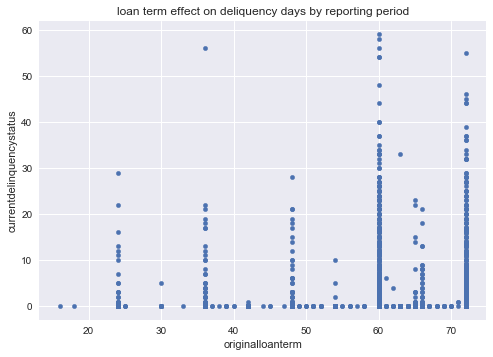

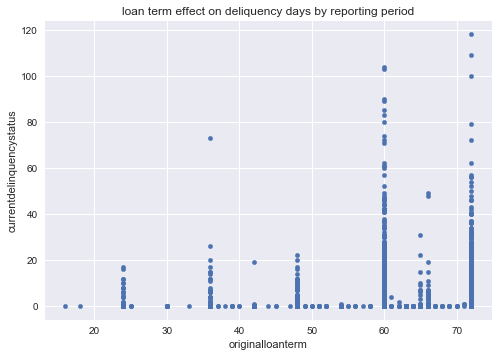

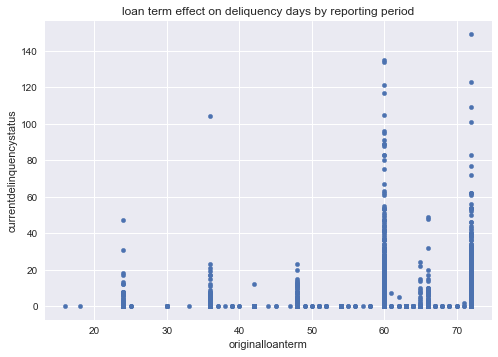

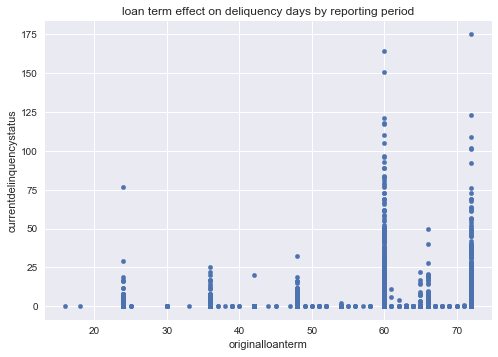

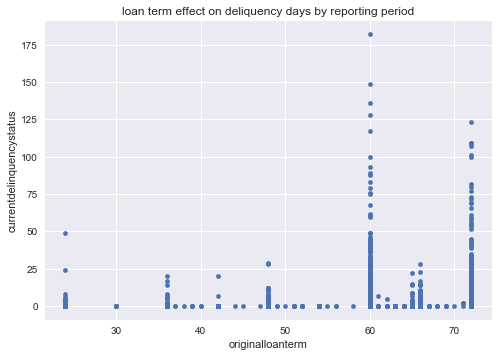

In [65]:
df.groupby(df.reportingperiodendingdate).plot(kind='scatter', x='originalloanterm',y='currentdelinquencystatus', title='loan term effect on deliquency days by reporting period')

### Original interest rate percentage

In [66]:
df.originalinterestratepercentage.isna().mean()

0.0

In [67]:
# get statistics for originalinterestratepercentage
df.originalinterestratepercentage.describe()

count    249758.000000
mean          2.421818
std           1.525038
min           0.010000
25%           1.000000
50%           1.900000
75%           2.990000
max          15.140000
Name: originalinterestratepercentage, dtype: float64

### Remove interest rates below zero

In [68]:
# drop rows with blank or negative original interest rate percentage and research on zero interest rate loans
u=pd.value_counts(df.originalinterestratepercentage<0)
if len(u)<2:
    print('No original interest rate blank or below zero')
else: 
    print('Number of original interest rate rows blank or below zero',':', u[1])
    print('Dropping ', u[1], 'rows and retaining loans with original interest rate with non-negative values')
    df=df[df.originalinterestratepercentage>=0]
df.shape

No original interest rate blank or below zero


(249758, 54)

### Retain zero interest loans?

In [69]:
# view zero original interest rate percentage loans
u=pd.value_counts(df.originalinterestratepercentage==0)
if len(u)<2:
    print('No zero original interest rate percentage')
else: 
    print('Number of zero original interest rate rows',':', u[1])
    #print('Dropping ', u[1], 'rows and retaining loans with original interest rate with non-negative values')
    #df=df[df.originalinterestratepercentage>=0]
df.shape

No zero original interest rate percentage


(249758, 54)

### Interest rate percent effect on deliquency days by reporting period

reportingperiodendingdate
2017-11-30    Axes(0.125,0.125;0.775x0.755)
2018-02-28    Axes(0.125,0.125;0.775x0.755)
2018-03-31    Axes(0.125,0.125;0.775x0.755)
2018-04-30    Axes(0.125,0.125;0.775x0.755)
2018-05-31    Axes(0.125,0.125;0.775x0.755)
dtype: object

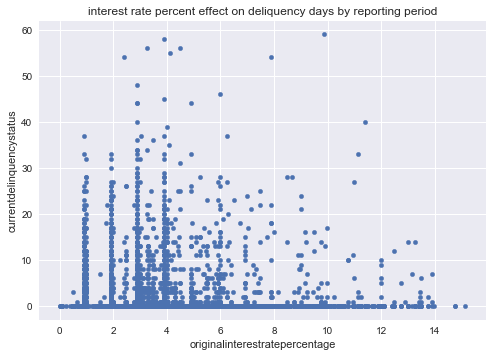

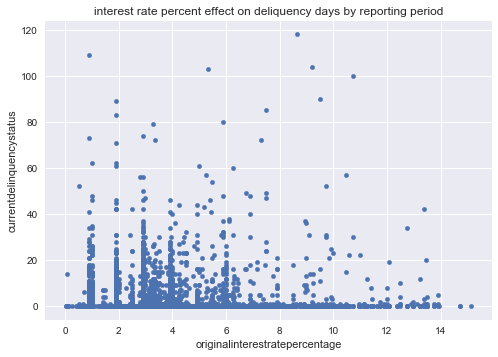

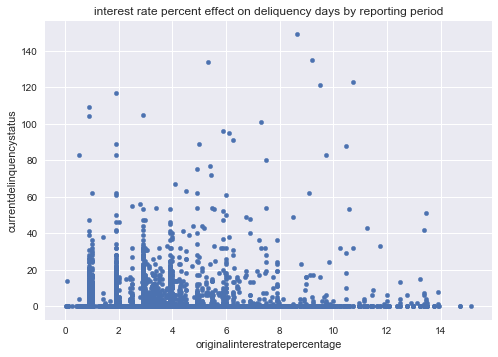

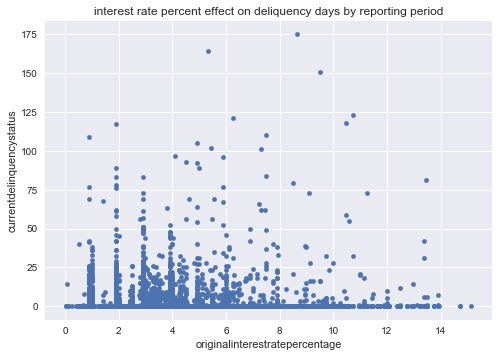

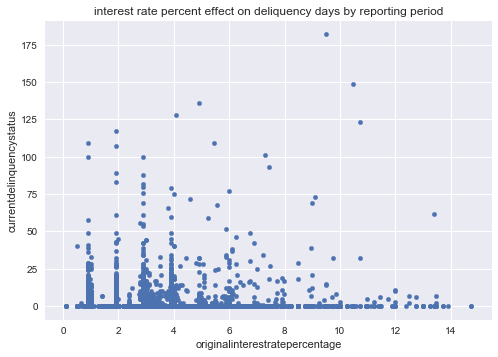

In [70]:
df.groupby(df.reportingperiodendingdate).plot(kind='scatter', x='originalinterestratepercentage',y='currentdelinquencystatus', title='interest rate percent effect on deliquency days by reporting period')

### Underwriting Indicator

Indicate whether the loan met the criteria for the first level of solicitation, credit-granting or underwriting criteria used to originate the loan.

In [71]:
df.underwritingindicator.unique()

array([ True, False], dtype=bool)

In [72]:
# missing values
df.underwritingindicator.isna().mean()

0.0

In [73]:
df['underwritingindicator']=df.underwritingindicator.astype('category')

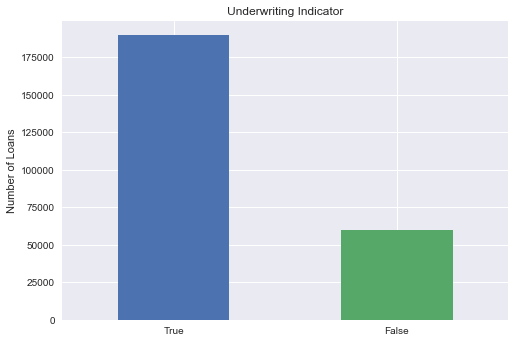

Top  -1  counts:  
 True    189927
Name: underwritingindicator, dtype: int64


In [74]:
draw(df.underwritingindicator, title='Underwriting Indicator', ylabel='Number of Loans', sort=True)

underwritingindicator
False    Axes(0.125,0.125;0.775x0.755)
True     Axes(0.125,0.125;0.775x0.755)
dtype: object

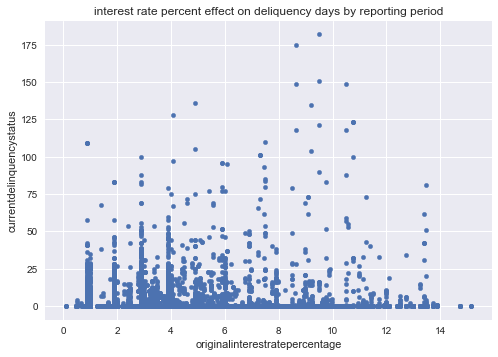

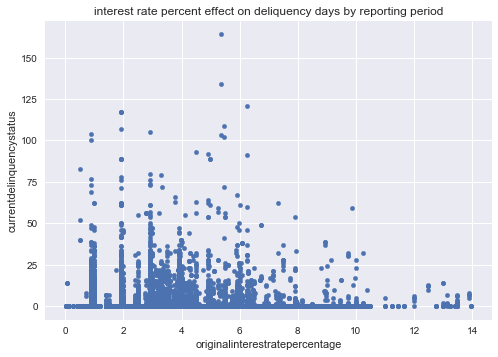

In [75]:
df.groupby(df.underwritingindicator).plot(kind='scatter', x='originalinterestratepercentage',y='currentdelinquencystatus', title='interest rate percent effect on deliquency days by reporting period')

### Create Feature Column Underwriting

In [76]:
def map_underwriting_true(*args):
    columns = [col for col in args]
    for column in columns:
        if column == True:
            return 1
        elif column == False:
            return 0
        
df['underwriting_true'] = list(map(map_underwriting_true, df.underwritingindicator))
df.drop(['underwritingindicator'], axis=1, inplace=True)
pd.value_counts(df.underwriting_true)

1    189927
0     59831
Name: underwriting_true, dtype: int64

### Underwriting TRUE current deliquency status

In [77]:
#df.loc[df.underwriting_true==1].currentdelinquencystatus.plot(kind='hist', bins=10)
print('Total :',df.loc[df.underwriting_true==1].currentdelinquencystatus.value_counts().sum())
df.loc[df.underwriting_true==1].currentdelinquencystatus.value_counts().head()

Total : 189927


0    183878
1      1158
2       694
3       570
4       515
Name: currentdelinquencystatus, dtype: int64

### Underwriting FALSE current deliquency status

In [78]:
#df.loc[df.underwriting_true==0].currentdelinquencystatus.plot(kind='hist', bins=10)
print('Total :',df.loc[df.underwriting_true==0].currentdelinquencystatus.value_counts().sum())
df.loc[df.underwriting_true==0].currentdelinquencystatus.value_counts().head()

Total : 59831


0    56911
1      523
2      257
3      223
4      171
Name: currentdelinquencystatus, dtype: int64

### Subvented

Indicate yes or no as to whether a form of subsidy is received on the loan, such as cash incentives or favorable financing for the buyer. 0: No, 1: Yes - Rate Subvention, 2: Yes - Cash Rebate, 98: Yes - Other

In [79]:
df.subvented.unique()

array(['["98"]', '["2"]', '["1"]', '["0"]'], dtype=object)

In [80]:
df['subvented']=df.subvented.astype('category')

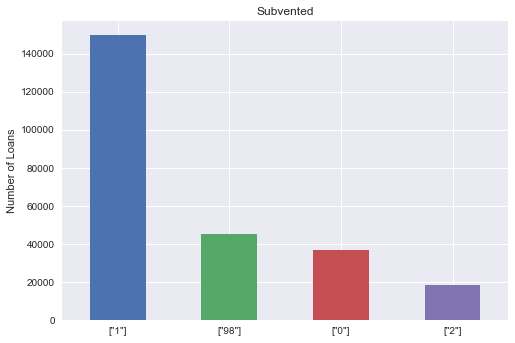

Top  -1  counts:  
 ["1"]     149699
["98"]     45032
["0"]      36814
Name: subvented, dtype: int64


In [81]:
draw(df.subvented, title='Subvented', ylabel='Number of Loans', sort=True)

In [82]:
df.subvented.describe(include='all')

count     249758
unique         4
top        ["1"]
freq      149699
Name: subvented, dtype: object

### subvented effect on original interest rate percent and current deliquency days by reporting period

subvented
["0"]     Axes(0.125,0.125;0.775x0.755)
["1"]     Axes(0.125,0.125;0.775x0.755)
["2"]     Axes(0.125,0.125;0.775x0.755)
["98"]    Axes(0.125,0.125;0.775x0.755)
dtype: object

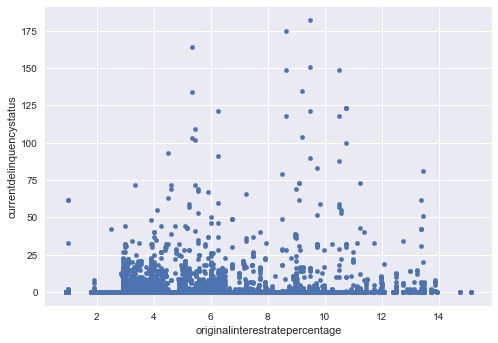

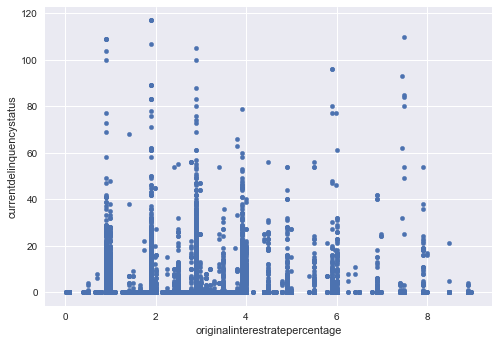

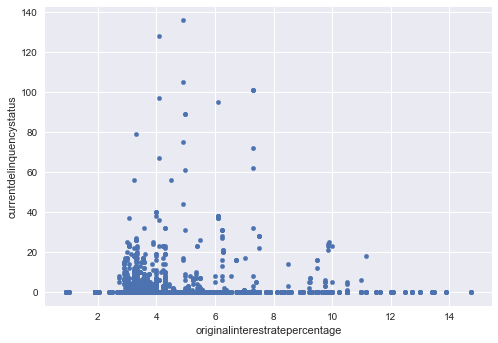

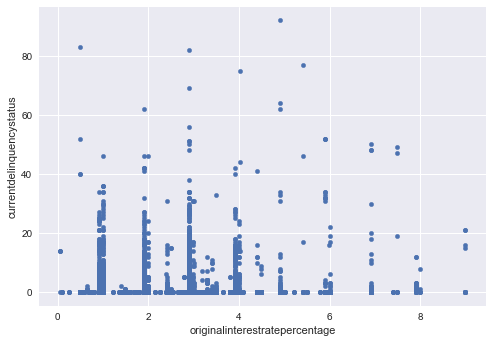

In [85]:
#label=df.groupby([df.reportingperiodendingdate, df.subvented])
#pd.value_counts(df.reportingperiodendingdate).keys().tolist()
#pd.value_counts(df.subvented).keys().tolist()
# sorted_obj=['["0"]','["1"]','["2"]''["98"]']
# label=[]
# for i in pd.value_counts(df.reportingperiodendingdate).sort_values(ascending=True).keys().tolist():
#     for j in pd.value_counts(df.subvented).sort_values(sorted_obj).keys().tolist():
#         label.append(str(i)+str(j))
# print(label)
#pd.value_counts(df.groupby([df.reportingperiodendingdate, df.subvented])).keys().tolist()


#df.loc[df.underwriting_true==0].currentdelinquencystatus.plot(kind='hist', bins=10)
df.groupby([df.subvented]).plot(kind='scatter', x='originalinterestratepercentage',y='currentdelinquencystatus')

### Create Feature Column for Subvented

In [86]:
# create feature columns for subvented
def map_subvented(*args):
    columns = [col for col in args]
    for column in columns:
        if column == code:
            return 1
        else:
            return 0
codes = pd.value_counts(df.subvented).index.tolist()

for code in codes:
        df['subvented_{}'.format(code)] = list(map(map_subvented, df.subvented))
        print('Added Column for :   subvented_'+code)
print('New Dataframe shape : ', df.shape)
df.drop(['subvented'], axis=1, inplace=True)

Added Column for :   subvented_["1"]
Added Column for :   subvented_["98"]
Added Column for :   subvented_["0"]
Added Column for :   subvented_["2"]
New Dataframe shape :  (249758, 58)


### Vehicle New or Used code

Indicate whether the vehicle financed is new or used at the time of origination. 1: New, 2: Used

In [87]:
df.vehiclenewusedcode.unique()

array([1, 2], dtype=int64)

In [88]:
df['vehiclenewusedcode']=df.vehiclenewusedcode.astype('category')

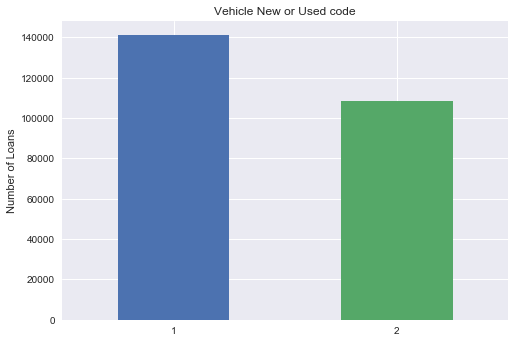

Top  -1  counts:  
 1    141158
Name: vehiclenewusedcode, dtype: int64


In [89]:
draw(df.vehiclenewusedcode, title='Vehicle New or Used code', ylabel='Number of Loans', sort=True)

### Create Feature Column for New or Used

In [90]:
def map_vehiclenewusedcode_true(*args):
    columns = [col for col in args]
    for column in columns:
        if column == 1:
            return 1
        else:
            return 0
        
df['vehiclenew_true'] = list(map(map_vehiclenewusedcode_true, df.vehiclenewusedcode))
print('Added Column for :   vehiclenew_true')
df.drop(['vehiclenewusedcode'], axis=1, inplace=True)
pd.value_counts(df.vehiclenew_true)

Added Column for :   vehiclenew_true


1    141158
0    108600
Name: vehiclenew_true, dtype: int64

### New Vehicles mean deliquency days by the reporting period

In [91]:
df.groupby([df.reportingperiodendingdate,df.vehiclenew_true]).currentdelinquencystatus.mean()

reportingperiodendingdate  vehiclenew_true
2017-11-30                 0                  0.284599
                           1                  0.210769
2018-02-28                 0                  0.360258
                           1                  0.284473
2018-03-31                 0                  0.391545
                           1                  0.334174
2018-04-30                 0                  0.448841
                           1                  0.345266
2018-05-31                 0                  0.510159
                           1                  0.334834
Name: currentdelinquencystatus, dtype: float64

### Vehicle Type code ---relevancy for machine learning ?

Indicate the code describing the vehicle type. 1: Car, 2:
Truck, 3: SUV, 4: Motorcycle, 98: Other, 99: Unknown

In [92]:
df.vehicletypecode.unique()

array([3, 1, 4], dtype=int64)

In [93]:
#df['vehicletypecode']=df.vehicletypecode.astype('category')

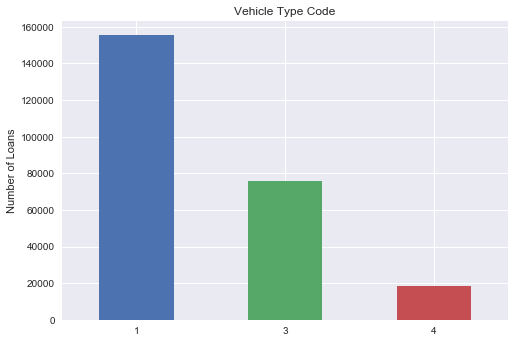

Top  -1  counts:  
 1    155454
3     75936
Name: vehicletypecode, dtype: int64


In [94]:
draw(df.vehicletypecode, title='Vehicle Type Code', ylabel='Number of Loans', sort=True)

In [95]:
df.vehicletypecode.describe()

count    249758.000000
mean          1.828706
std           1.091464
min           1.000000
25%           1.000000
50%           1.000000
75%           3.000000
max           4.000000
Name: vehicletypecode, dtype: float64

In [96]:
df.drop(['vehicletypecode'],axis=1, inplace=True)
df.shape

(249758, 56)

### Obligor Credit Score Type

Specify the type of the standardized credit score used to
evaluate the obligor during the loan origination process

In [97]:
df.obligorcreditscoretype.unique()

array(['FICO'], dtype=object)

In [98]:
df['obligorcreditscoretype']=df.obligorcreditscoretype.astype('category')

In [99]:
df.obligorcreditscoretype.isna().mean()

0.0

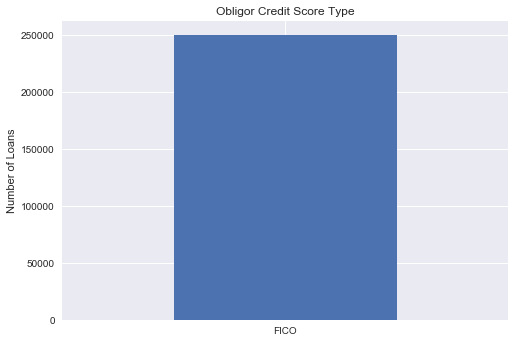

Top  -1  counts:  
 Series([], Name: obligorcreditscoretype, dtype: int64)


In [100]:
draw(df.obligorcreditscoretype, title='Obligor Credit Score Type', ylabel='Number of Loans', sort=True)

In [101]:
df.obligorcreditscoretype.describe()

count     249758
unique         1
top         FICO
freq      249758
Name: obligorcreditscoretype, dtype: object

In [102]:
df.groupby([df.reportingperiodendingdate,df.obligorcreditscoretype]).currentdelinquencystatus.mean()

reportingperiodendingdate  obligorcreditscoretype
2017-11-30                 FICO                      0.242685
2018-02-28                 FICO                      0.317511
2018-03-31                 FICO                      0.359186
2018-04-30                 FICO                      0.390423
2018-05-31                 FICO                      0.410844
Name: currentdelinquencystatus, dtype: float64

### Create features for obligator credit score type

In [103]:
def map_obligorcreditscoretype(*args):
    columns = [col for col in args]
    for column in columns:
        if column == code:
            return 1
        else:
            return 0
codes = pd.value_counts(df.obligorcreditscoretype).index.tolist()

for code in codes:
        df['credit_type_{}'.format(code)] = list(map(map_obligorcreditscoretype, df.obligorcreditscoretype))
        print('Added Column for :   credit_type_'+code)
#df.drop(['obligorcreditscoretype'], axis=1, inplace=True)
df.shape       

Added Column for :   credit_type_FICO


(249758, 57)

### Obligor Credit Score

Provide the standardized credit score of the obligor used to
evaluate the obligor during the loan origination process

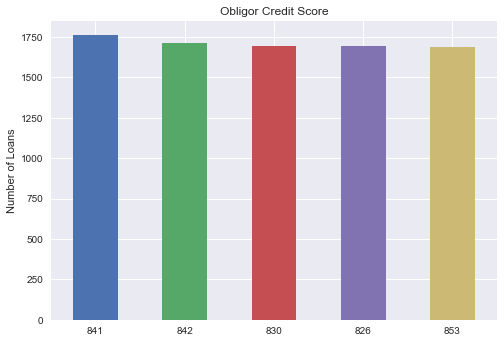

Top  10  counts:  
 841    1761
842    1710
830    1693
826    1691
853    1687
831    1669
818    1647
816    1637
844    1636
824    1635
Name: obligorcreditscore, dtype: int64


In [104]:
draw(df.obligorcreditscore, title='Obligor Credit Score', ylabel='Number of Loans', sort=True, n=10)

In [105]:
df.obligorcreditscore.describe()

count    249758.000000
mean        779.349991
std          65.851676
min           0.000000
25%         729.000000
50%         786.000000
75%         834.000000
max         900.000000
Name: obligorcreditscore, dtype: float64

### Remove and Drop rows of Obligor Credit Score with strings('no score', 'none', 'Nan')

In [106]:
#search for strings in the columns
q=df.obligorcreditscore.astype(str).str.contains(r'^([^0-9]*)$', na=False).sum()
print('Number of Strings in the Columns : ', q)
if q > 0:
    u=df[df.obligorcreditscore.astype(str).str.contains(r'^([^0-9]*)$', na=False)].obligorcreditscore.unique()
    print('Strings in data : ', u)
    df=df[~df.obligorcreditscore.astype(str).str.contains(r'^([^0-9]*)$', na=False)]
else:
    print('No strings in the Obligor Credit Score')
    


Number of Strings in the Columns :  0
No strings in the Obligor Credit Score


In [107]:
#Number of blanks in the column
df.obligorcreditscore.astype(str).str.contains(r'^(\s+)$').sum()

0

In [108]:
#pd.crosstab(df.reportingperiodendingdate, df.obligorcreditscore)

In [109]:

#df=df[~df.obligorcreditscore.str.contains(r'^([^0-9]*)$', na=False)]

In [110]:
#df.isnull().sum()

In [111]:
#df.obligorcreditscore.isnull().value_counts()

In [112]:
#df[df.obligorcreditscore.isnull()]

In [113]:
df=df.dropna(subset=['obligorcreditscore'])

In [114]:
df.obligorcreditscore.value_counts(dropna=False).sort_values(ascending=False).head()

841    1761
842    1710
830    1693
826    1691
853    1687
Name: obligorcreditscore, dtype: int64

In [115]:
df.obligorcreditscore.isnull().values.any()

False

In [116]:
df['obligorcreditscore']=df.obligorcreditscore.astype('float')

In [117]:
df.groupby([df.reportingperiodendingdate, df.obligorcreditscoretype]).obligorcreditscore.mean()

reportingperiodendingdate  obligorcreditscoretype
2017-11-30                 FICO                      779.279339
2018-02-28                 FICO                      779.555953
2018-03-31                 FICO                      779.554853
2018-04-30                 FICO                      779.554526
2018-05-31                 FICO                      778.491310
Name: obligorcreditscore, dtype: float64

In [119]:
df.drop(['obligorcreditscoretype'], axis=1, inplace=True)

### Obligor Income Verification Level Code

Indicate the code describing the extent to which the
obligor's income was verified during the loan origination
process. 1: Not stated, not verified, 2: Stated, not verified,
3: Stated, verified but not to level 4 or level 5., 4: Stated,
"level 4" verifiedLevel 4 income verification = Previous year
W-2 or tax returns, and year-to-date pay stubs, if salaried. If
self-employed, then obligor provided 2 years of tax returns.,
5: Stated, "level 5" verifiedLevel 5 income verification = 24
months income verification (W-2s, pay stubs, bank
statements and/or tax returns). If self-employed, then
obligor provided 2 years tax returns plus a CPA certification
of the tax returns.

In [124]:
df.obligorincomeverificationlevelcode.isna().mean()

0.0

In [120]:
df['obligorincomeverificationlevelcode']=df.obligorincomeverificationlevelcode.astype('category')

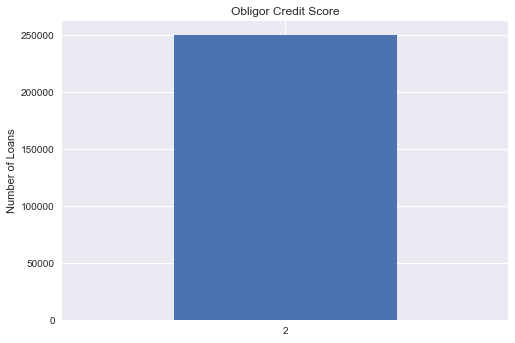

Top  -1  counts:  
 Series([], Name: obligorincomeverificationlevelcode, dtype: int64)


In [121]:
draw(df.obligorincomeverificationlevelcode, title='Obligor Credit Score', ylabel='Number of Loans', sort=True)

In [122]:
df.obligorincomeverificationlevelcode.describe()

count     249758
unique         1
top            2
freq      249758
Name: obligorincomeverificationlevelcode, dtype: int64

In [126]:
pd.value_counts(df.obligorincomeverificationlevelcode)

2    249758
Name: obligorincomeverificationlevelcode, dtype: int64

In [127]:
u=pd.value_counts(df.obligorincomeverificationlevelcode==0)
if len(u)<2:
    print('No blank or zero obligor income verification level code')
else: 
    print('Number of loans with no obligor income verification level code',':', u[1])
    print('Dropping ', u[1], 'rows and retaining loans with obligor income verification level code')
    df=df[df.obligorincomeverificationlevelcode>0]
df.shape

No blank or zero obligor income verification level code


(249758, 56)

In [128]:
df.groupby([df.reportingperiodendingdate, df.obligorincomeverificationlevelcode]).obligorcreditscore.mean()

reportingperiodendingdate  obligorincomeverificationlevelcode
2017-11-30                 2                                     779.279339
2018-02-28                 2                                     779.555953
2018-03-31                 2                                     779.554853
2018-04-30                 2                                     779.554526
2018-05-31                 2                                     778.491310
Name: obligorcreditscore, dtype: float64

In [129]:
df.groupby([df.reportingperiodendingdate, df.obligorincomeverificationlevelcode]).currentdelinquencystatus.mean()

reportingperiodendingdate  obligorincomeverificationlevelcode
2017-11-30                 2                                     0.242685
2018-02-28                 2                                     0.317511
2018-03-31                 2                                     0.359186
2018-04-30                 2                                     0.390423
2018-05-31                 2                                     0.410844
Name: currentdelinquencystatus, dtype: float64

### Create Feature Columns for Obligor Income Verification Code

In [130]:
def map_obligorincomeverificationlevelcode(*args):
    columns = [col for col in args]
    for column in columns:
        if column == code:
            return 1
        else:
            return 0
codes = pd.value_counts(df.obligorincomeverificationlevelcode).index.tolist()

for code in codes:
        df['income_code_{}'.format(code)] = list(map(map_obligorincomeverificationlevelcode, df.obligorincomeverificationlevelcode))
        print('Added Column for :   income_code_'+str(code))
df.drop(['obligorincomeverificationlevelcode'], axis=1, inplace=True)
df.shape

Added Column for :   income_code_2


(249758, 56)

### Obligor Employment Verification Code

Indicate the code describing the extent to which the
obligor's employment was verified during the loan
origination process. 1: Not stated, not verified, 2: Stated,
not verified, 3: Stated, level 3 verified Level 3 verified =
Direct independent verification with a third party of the
obligors current employment.

In [131]:
df.obligoremploymentverificationcode.isna().mean()

0.0

In [132]:
df['obligoremploymentverificationcode']=df.obligoremploymentverificationcode.astype('category')

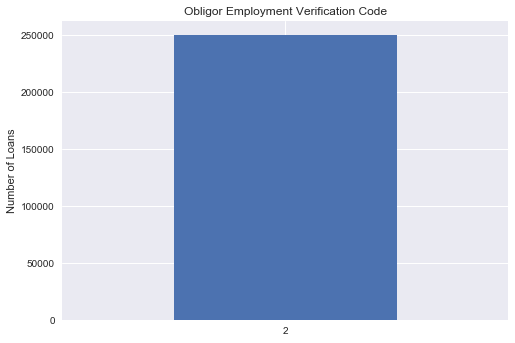

Top  -1  counts:  
 Series([], Name: obligoremploymentverificationcode, dtype: int64)


In [133]:
draw(df.obligoremploymentverificationcode, title='Obligor Employment Verification Code', ylabel='Number of Loans', sort=True)

In [134]:
df.obligoremploymentverificationcode.describe()

count     249758
unique         1
top            2
freq      249758
Name: obligoremploymentverificationcode, dtype: int64

In [135]:
u=pd.value_counts(df.obligoremploymentverificationcode==0)
if len(u)<2:
    print('No blank or zero obligor employment verification level code')
else: 
    print('Number of loans with no obligor employment verification level code',':', u[1])
    print('Dropping ', u[1], 'rows and retaining loans with obligor employment verification level code')
    df=df[df.obligoremploymentverificationcode>0]
df.shape

No blank or zero obligor employment verification level code


(249758, 56)

In [136]:
df.groupby([df.reportingperiodendingdate, df.obligoremploymentverificationcode]).obligorcreditscore.mean()

reportingperiodendingdate  obligoremploymentverificationcode
2017-11-30                 2                                    779.279339
2018-02-28                 2                                    779.555953
2018-03-31                 2                                    779.554853
2018-04-30                 2                                    779.554526
2018-05-31                 2                                    778.491310
Name: obligorcreditscore, dtype: float64

In [137]:
df.groupby([df.reportingperiodendingdate, df.obligoremploymentverificationcode]).currentdelinquencystatus.mean()

reportingperiodendingdate  obligoremploymentverificationcode
2017-11-30                 2                                    0.242685
2018-02-28                 2                                    0.317511
2018-03-31                 2                                    0.359186
2018-04-30                 2                                    0.390423
2018-05-31                 2                                    0.410844
Name: currentdelinquencystatus, dtype: float64

### Create feature Columns for obligor employment verification

In [138]:
def map_obligoremploymentverificationcode(*args):
    columns = [col for col in args]
    for column in columns:
        if column == code:
            return 1
        else:
            return 0
codes = pd.value_counts(df.obligoremploymentverificationcode).index.tolist()

for code in codes:
        df['empl_code_{}'.format(code)] = list(map(map_obligoremploymentverificationcode, df.obligoremploymentverificationcode))
        print('Added Column for :   empl_code_'+str(code))
df.drop(['obligoremploymentverificationcode'], axis=1, inplace=True)
df.shape

Added Column for :   empl_code_2


(249758, 56)

### Co-obligator Indicator

Indicate whether the loan has a co-obligor.

In [140]:
df.coobligorindicator.isna().mean()

0.0

In [141]:
df['coobligorindicator']=df.coobligorindicator.astype('category')

In [142]:
df.coobligorindicator.describe()

count     249758
unique         2
top        False
freq      187733
Name: coobligorindicator, dtype: object

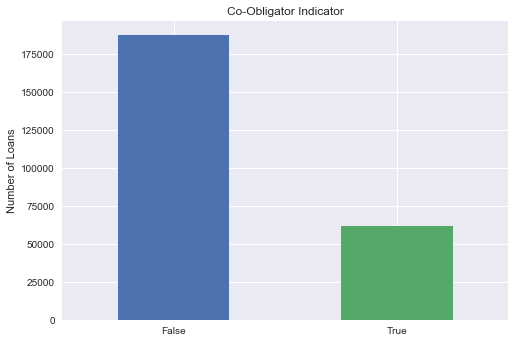

Top  -1  counts:  
 False    187733
Name: coobligorindicator, dtype: int64


In [143]:
draw(df.coobligorindicator, title='Co-Obligator Indicator', ylabel='Number of Loans', sort=True)

In [144]:
df.groupby([df.reportingperiodendingdate, df.coobligorindicator]).obligorcreditscore.mean()

reportingperiodendingdate  coobligorindicator
2017-11-30                 False                 774.405766
                           True                  794.014806
2018-02-28                 False                 774.791767
                           True                  793.986055
2018-03-31                 False                 774.792225
                           True                  793.980249
2018-04-30                 False                 774.791672
                           True                  793.980249
2018-05-31                 False                 773.539731
                           True                  793.454730
Name: obligorcreditscore, dtype: float64

In [145]:
df.groupby([df.reportingperiodendingdate, df.coobligorindicator]).currentdelinquencystatus.mean()

reportingperiodendingdate  coobligorindicator
2017-11-30                 False                 0.248519
                           True                  0.225047
2018-02-28                 False                 0.324034
                           True                  0.297754
2018-03-31                 False                 0.371248
                           True                  0.322654
2018-04-30                 False                 0.401673
                           True                  0.356351
2018-05-31                 False                 0.415861
                           True                  0.395682
Name: currentdelinquencystatus, dtype: float64

### Create features for Co-obligator Indicator

In [146]:
def map_coobligorindicator_true(*args):
    columns = [col for col in args]
    for column in columns:
        if column == 1:
            return 1
        else:
            return 0
        
df['coobligorindicator_true'] = list(map(map_coobligorindicator_true, df.coobligorindicator))
df.drop(['coobligorindicator'], axis=1, inplace=True)
print('Added Column for :   coobligorindicator_true')
pd.value_counts(df.coobligorindicator_true)

Added Column for :   coobligorindicator_true


0    187733
1     62025
Name: coobligorindicator_true, dtype: int64

### Reporting Period Actual End Balance Amount

Mean reporting period actual end balance amount by the reporting period ending date

In [149]:
df.reportingperiodactualendbalanceamount.isna().mean()

0.0

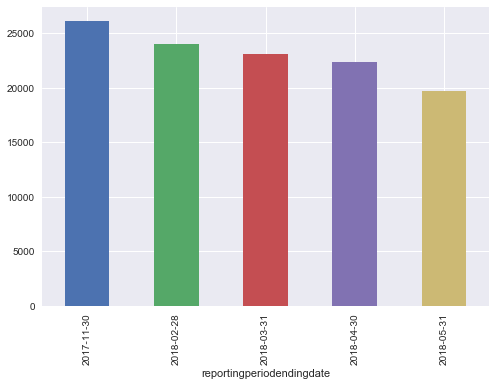

In [147]:
df.groupby(df.reportingperiodendingdate).reportingperiodactualendbalanceamount.mean().plot(kind='bar')

In [148]:
df.reportingperiodactualendbalanceamount.describe()

count    249758.000000
mean      23351.184177
std       14948.553717
min           0.000000
25%       13579.805000
50%       21514.395000
75%       30841.367500
max      177603.400000
Name: reportingperiodactualendbalanceamount, dtype: float64

In [150]:
df.groupby([df.reportingperiodendingdate]).reportingperiodactualendbalanceamount.mean()

reportingperiodendingdate
2017-11-30    26108.681083
2018-02-28    24029.057537
2018-03-31    23129.778100
2018-04-30    22331.729804
2018-05-31    19687.162217
Name: reportingperiodactualendbalanceamount, dtype: float64

reportingperiodendingdate
2017-11-30    Axes(0.125,0.125;0.775x0.755)
2018-02-28    Axes(0.125,0.125;0.775x0.755)
2018-03-31    Axes(0.125,0.125;0.775x0.755)
2018-04-30    Axes(0.125,0.125;0.775x0.755)
2018-05-31    Axes(0.125,0.125;0.775x0.755)
dtype: object

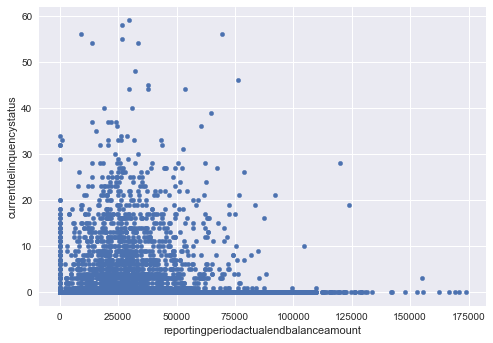

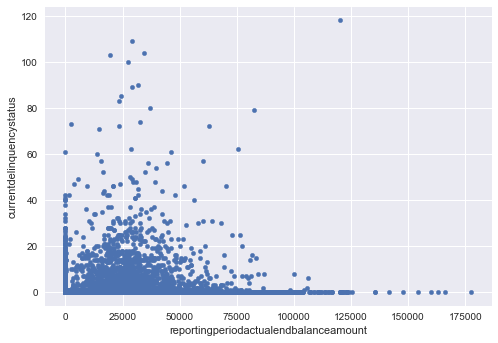

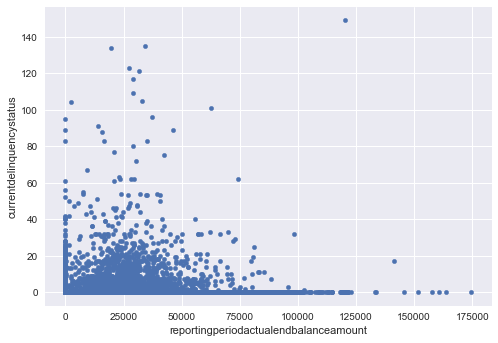

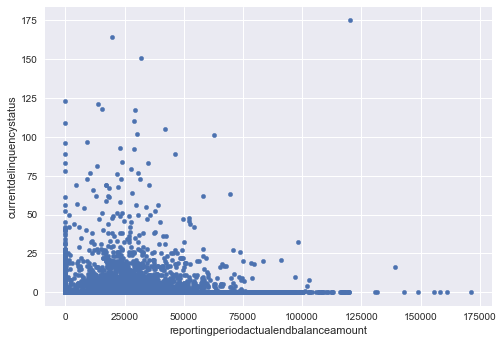

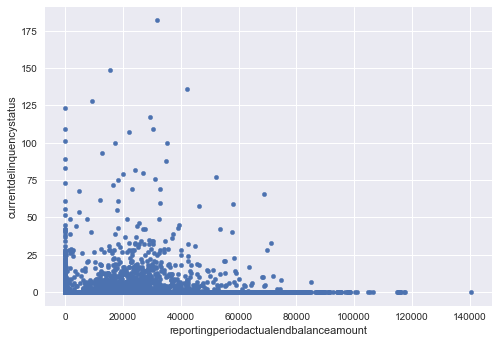

In [151]:
df.groupby([df.reportingperiodendingdate]).plot(kind='scatter', x='reportingperiodactualendbalanceamount',y='currentdelinquencystatus')

### Dropping loans with zero or negative reporting period actual end balance amount

In [152]:
u=pd.value_counts(df.reportingperiodactualendbalanceamount<=0)
if len(u)<2:
    print('No blank or zero or negative reporting period actual end balance amount')
else: 
    print('Number of loans with no reporting period actual end balance amount',':', u[1])
    print('Dropping ', u[1], 'rows and retaining loans with reporting period actual end balance amount')
    df=df[df.reportingperiodactualendbalanceamount>0]
df.shape

Number of loans with no reporting period actual end balance amount : 12734
Dropping  12734 rows and retaining loans with reporting period actual end balance amount


(237024, 56)

### Total Actual amount paid...keep or drop?

In [155]:
df.totalactualamountpaid.isna().mean()

0.0

In [153]:
df.totalactualamountpaid.describe()

count    237024.000000
mean        639.596447
std         918.155720
min      -72031.970000
25%         396.010000
50%         538.410000
75%         741.840000
max       74182.000000
Name: totalactualamountpaid, dtype: float64

In [154]:
u=pd.value_counts(df.totalactualamountpaid<=0)
if len(u)<2:
    print('No blank or zero or negative total actual amount paid')
else: 
    print('Number of loans with no or negative total actual amount paid',':', u[1])
    #print('Dropping ', u[1], 'rows and retaining loans with positive total actual amount paid')
    #df=df[df.totalactualamountpaid>0]
df.shape

Number of loans with no or negative total actual amount paid : 11888


(237024, 56)

### Actual interest collected amount...keep or drop

In [156]:
df.actualinterestcollectedamount.isna().mean()

0.0

In [157]:
df.actualinterestcollectedamount.describe()

count    237024.000000
mean         48.405476
std          49.802629
min       -1303.820000
25%          18.750000
50%          35.080000
75%          62.220000
max        1745.410000
Name: actualinterestcollectedamount, dtype: float64

In [158]:
u=pd.value_counts(df.actualinterestcollectedamount<=0)
if len(u)<2:
    print('No blank or zero actual interest collected amount')
else: 
    print('Number of loans with no or negative actual interest collected amount',':', u[1])
    #print('Dropping ', u[1], 'rows and retaining loans with positive actual interest collected amount')
    #df=df[df.actualinterestcollectedamount>0]
df.shape

Number of loans with no or negative actual interest collected amount : 11853


(237024, 56)

### Actual principal collected amount...keep or drop

In [160]:
df.actualprincipalcollectedamount.isna().mean()

0.0

In [159]:
df.actualprincipalcollectedamount.describe()

count    237024.000000
mean        595.812546
std         910.265351
min      -72031.970000
25%         359.580000
50%         493.700000
75%         682.250000
max       74001.130000
Name: actualprincipalcollectedamount, dtype: float64

In [161]:
u=pd.value_counts(df.actualprincipalcollectedamount<=0)
if len(u)<2:
    print('No blank or zero actual principal collected amount')
else: 
    print('Number of loans with zero or negative actual principal collected amount',':', u[1])
    #print('Dropping ', u[1], 'rows and retaining loans with positive actual principal collected amount')
    #df=df[df.actualprincipalcollectedamount>0]
df.shape

Number of loans with zero or negative actual principal collected amount : 11949


(237024, 56)

### Interest paid through date

In [164]:
df.interestpaidthroughdate.isna().mean()
#pd.value_counts(df.interestpaidthroughdate).head(n=10)

0.00012656946132037262

In [165]:
df.interestpaidthroughdate.isna().sum()

30

In [166]:
df.interestpaidthroughdate.describe()

count         236994
unique           389
top       2018-02-28
freq            4281
Name: interestpaidthroughdate, dtype: object

### Dropping interest paid through date '1900-01-01'

In [167]:
u=pd.value_counts(df.interestpaidthroughdate=='1900-01-01')
if len(u)<2:
    print('No blank or zero interest paid throughdate as 1900-01-01')
else: 
    print('Number of loans with zero or 1900-01-01 as  interest paid throughdate',':', u[1])
    #print('Dropping ', u[1], 'rows and retaining loans with correct interest paid throughdate')
    #df=df[df.interestpaidthroughdate>'1900-01-01']
df.shape

No blank or zero interest paid throughdate as 1900-01-01


(237024, 56)

### Dropping interest paid through data

In [168]:
df.drop(['interestpaidthroughdate'], axis=1, inplace=True)
df.shape

(237024, 55)

### Number of Days from origination to first payment date

In [170]:
df.daystofirstpayment.isna().mean()

0.0

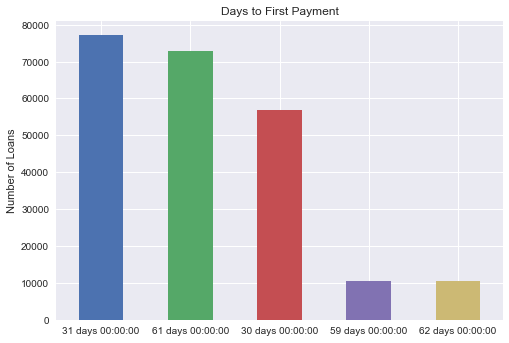

Top  5  counts:  
 31 days    77198
61 days    72813
30 days    56876
59 days    10648
62 days    10583
Name: daystofirstpayment, dtype: int64


In [169]:
df['daystofirstpayment'] = pd.to_datetime(df['originalfirstpaymentdate'])-pd.to_datetime(df['originationdate'])
#draw a chart for visual look and analysis
draw(df.daystofirstpayment, title='Days to First Payment', ylabel='Number of Loans', sort = True, n=5)


In [171]:
df.daystofirstpayment.describe()

count                     237024
mean     42 days 15:03:33.244228
std      15 days 02:55:18.041619
min              0 days 00:00:00
25%             30 days 00:00:00
50%             31 days 00:00:00
75%             61 days 00:00:00
max             62 days 00:00:00
Name: daystofirstpayment, dtype: object

### Create a new feature for number of days to first payment

In [172]:
#remove days string for machine learning
df['daystofirstpayment']=df.daystofirstpayment.map(lambda x: np.nan if pd.isnull(x) else x.days)
#display last five rows
df.daystofirstpayment.tail()

249994    62
249995    31
249997    31
249998    62
249999    62
Name: daystofirstpayment, dtype: int64

### Number of loans with zero days to first payment

In [173]:
u=pd.value_counts(df.daystofirstpayment==0)
if len(u)<2:
    print('No blank or zero days to first payment')
else: 
    print('Number of loans with zero days to first payment',':', u[1])
    #print('Dropping ', u[1], 'rows and retaining loans with positive total actual amount paid')
    #df=df[df.daystofirstpayment>0]
df.shape

Number of loans with zero days to first payment : 793


(237024, 56)

In [174]:
df.groupby([df.reportingperiodendingdate]).daystofirstpayment.mean()

reportingperiodendingdate
2017-11-30    42.617675
2018-02-28    42.574892
2018-03-31    42.581967
2018-04-30    42.581967
2018-05-31    42.880382
Name: daystofirstpayment, dtype: float64

In [176]:
#df.groupby([df.reportingperiodendingdate]).plot(kind='scatter', x='daystofirstpayment',y='currentdelinquencystatus')

In [177]:
df.drop(['originalfirstpaymentdate'], axis=1, inplace=True)
df.shape

(237024, 55)

### Grace Period Number

Indicate the number of months during which time interest accrues but no payments are due from the obligor.

In [178]:
df.graceperiodnumber.isna().mean()

0.0

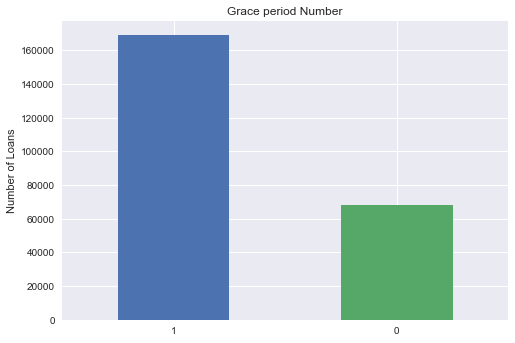

Top  -1  counts:  
 1    169040
Name: graceperiodnumber, dtype: int64


In [179]:
draw(df.graceperiodnumber, title='Grace period Number', ylabel='Number of Loans', sort = True)

In [180]:
df.graceperiodnumber.describe()

count    237024.000000
mean          0.713177
std           0.452279
min           0.000000
25%           0.000000
50%           1.000000
75%           1.000000
max           1.000000
Name: graceperiodnumber, dtype: float64

In [181]:
df.groupby([df.reportingperiodendingdate]).graceperiodnumber.mean()

reportingperiodendingdate
2017-11-30    0.715192
2018-02-28    0.712700
2018-03-31    0.712907
2018-04-30    0.713554
2018-05-31    0.710201
Name: graceperiodnumber, dtype: float64

### Number of loans with zero grace period

In [182]:
u=pd.value_counts(df.graceperiodnumber==0)
if len(u)<2:
    print('No blank or zero grace period number')
else: 
    print('Number of loans with zero grace period number',':', u[1])
    #print('Dropping ', u[1], 'rows and retaining loans with positive grace period number')
    #df=df[df.graceperiodnumber>0]
df.shape

Number of loans with zero grace period number : 67984


(237024, 55)

### Asset added indicator...not included

Indicate yes or no whether the asset was added during the
reporting period. Instruction: A response to this data point
is only required when assets are added to the asset pool
after the final prospectus is filed

In [183]:
df['assetaddedindicator']=df.assetaddedindicator.astype('category')

In [184]:
df.assetaddedindicator.isna().mean()

0.0

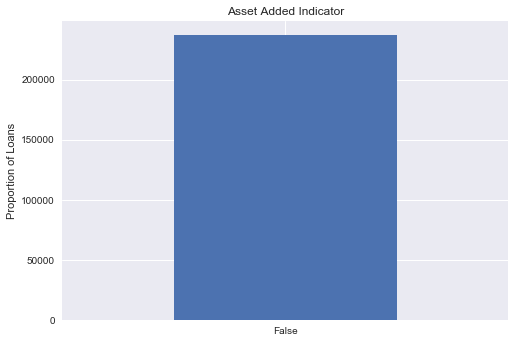

Top  2  counts:  
 False    237024
Name: assetaddedindicator, dtype: int64


In [185]:
draw(df.assetaddedindicator, title='Asset Added Indicator', ylabel='Proportion of Loans', sort = False, n=2)

In [186]:
df.assetaddedindicator.describe()

count     237024
unique         1
top        False
freq      237024
Name: assetaddedindicator, dtype: object

In [187]:
u=pd.value_counts(df.assetaddedindicator!=False)
if len(u)<2:
    print('No blank or zero Asset Added Indicator')
else: 
    print('Number of loans with zero or blank Asset Added Indicator',':', u[1])
    #print('Dropping ', u[1], 'rows and retaining loans with positive asset added indicator')
    #df=df[df.assetaddedindicator>0]
df.shape

No blank or zero Asset Added Indicator


(237024, 55)

In [189]:
df.groupby([df.reportingperiodendingdate, df.assetaddedindicator]).currentdelinquencystatus.mean()

reportingperiodendingdate  assetaddedindicator
2017-11-30                 False                  0.231587
2018-02-28                 False                  0.281098
2018-03-31                 False                  0.310974
2018-04-30                 False                  0.328695
2018-05-31                 False                  0.333507
Name: currentdelinquencystatus, dtype: float64

In [190]:
df.groupby([df.reportingperiodendingdate, df.assetaddedindicator]).obligorcreditscore.mean()

reportingperiodendingdate  assetaddedindicator
2017-11-30                 False                  779.193017
2018-02-28                 False                  779.382416
2018-03-31                 False                  779.265851
2018-04-30                 False                  779.206203
2018-05-31                 False                  778.478179
Name: obligorcreditscore, dtype: float64

In [191]:
df.drop(['assetaddedindicator'], axis=1, inplace=True)
df.shape

(237024, 54)

### Reporting Period Modification Indicator

Indicates yes or no whether the loan was modified from its
original terms during the reporting period.

In [192]:
df.reportingperiodmodificationindicator.isna().mean()

0.0

In [193]:
df['reportingperiodmodificationindicator']=df.reportingperiodmodificationindicator.astype('category')

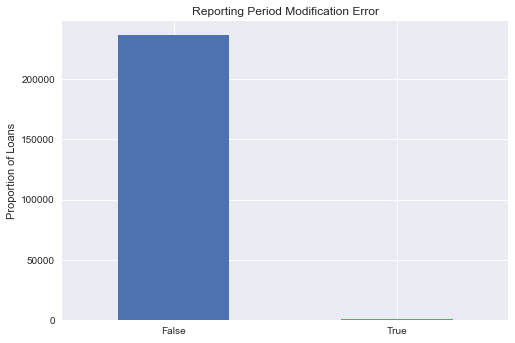

Top  -1  counts:  
 False    236754
Name: reportingperiodmodificationindicator, dtype: int64


In [194]:
draw(df.reportingperiodmodificationindicator, title='Reporting Period Modification Error', ylabel='Proportion of Loans', sort = True)

In [195]:
df.reportingperiodmodificationindicator.describe()

count     237024
unique         2
top        False
freq      236754
Name: reportingperiodmodificationindicator, dtype: object

In [197]:
df.groupby([df.reportingperiodendingdate, df.reportingperiodmodificationindicator]).currentdelinquencystatus.mean()

reportingperiodendingdate  reportingperiodmodificationindicator
2017-11-30                 False                                   0.228513
                           True                                    3.480769
2018-02-28                 False                                   0.280869
                           True                                    0.461538
2018-03-31                 False                                   0.310141
                           True                                    1.072727
2018-04-30                 False                                   0.328300
                           True                                    0.698113
2018-05-31                 False                                   0.332303
                           True                                    1.155556
Name: currentdelinquencystatus, dtype: float64

In [196]:
df.groupby([df.reportingperiodendingdate, df.reportingperiodmodificationindicator]).obligorcreditscore.mean()

reportingperiodendingdate  reportingperiodmodificationindicator
2017-11-30                 False                                   779.279510
                           True                                    687.769231
2018-02-28                 False                                   779.480365
                           True                                    702.215385
2018-03-31                 False                                   779.357837
                           True                                    695.109091
2018-04-30                 False                                   779.307001
                           True                                    685.000000
2018-05-31                 False                                   778.610681
                           True                                    688.000000
Name: obligorcreditscore, dtype: float64

### Create Features for Reporting Period Modification Indicator True

In [198]:
def map_reportingperiodmodificationindicator_true(*args):
    columns = [col for col in args]
    for column in columns:
        if column == 1:
            return 1
        else:
            return 0
        
df['reportingperiodmodificationindicator_true'] = list(map(map_reportingperiodmodificationindicator_true, df.reportingperiodmodificationindicator))
print('Added Column for :   reportingperiodmodificationindicator_true')
df.drop(['reportingperiodmodificationindicator'], axis=1, inplace=True)
pd.value_counts(df.reportingperiodmodificationindicator_true)

Added Column for :   reportingperiodmodificationindicator_true


0    236754
1       270
Name: reportingperiodmodificationindicator_true, dtype: int64

In [199]:
df.shape

(237024, 54)

### Servicing Advance Method Code...revealing default status!

Specify the code that indicates a servicer's responsibility for
advancing principal or interest on delinquent loans. 1: No
advancing, 2: Interest only, 3: Principal only, 4: Principal and
Interest, 99: Unavailable

In [203]:
df.servicingadvancemethodcode.isna().mean()

0.0

In [204]:
df['servicingadvancemethodcode']=df.servicingadvancemethodcode.astype('category')

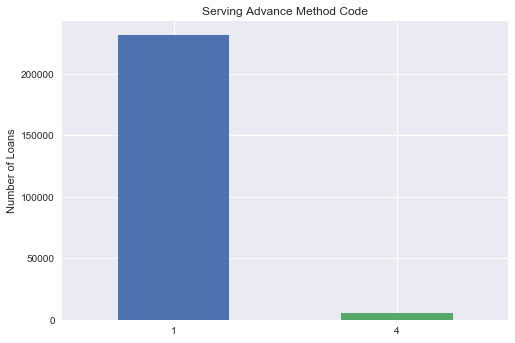

Top  100  counts:  
 1    231311
4      5713
Name: servicingadvancemethodcode, dtype: int64


In [209]:
draw(df.servicingadvancemethodcode, title='Serving Advance Method Code', ylabel='Number of Loans', sort = True, n=100)

In [206]:
df.servicingadvancemethodcode.describe()

count     237024
unique         2
top            1
freq      231311
Name: servicingadvancemethodcode, dtype: int64

In [207]:
df.groupby([df.reportingperiodendingdate, df.servicingadvancemethodcode]).obligorcreditscore.mean()

reportingperiodendingdate  servicingadvancemethodcode
2017-11-30                 1                             780.118945
                           4                             730.805421
2018-02-28                 1                             780.703627
                           4                             730.035153
2018-03-31                 1                             780.715827
                           4                             721.573279
2018-04-30                 1                             780.823777
                           4                             720.515038
2018-05-31                 1                             779.988865
                           4                             720.235219
Name: obligorcreditscore, dtype: float64

In [208]:
df.groupby([df.reportingperiodendingdate, df.servicingadvancemethodcode]).currentdelinquencystatus.mean()

reportingperiodendingdate  servicingadvancemethodcode
2017-11-30                 1                              0.072115
                           4                              8.565344
2018-02-28                 1                              0.064681
                           4                              8.364248
2018-03-31                 1                              0.036041
                           4                             11.250202
2018-04-30                 1                              0.044159
                           4                             10.652632
2018-05-31                 1                              0.041874
                           4                             11.577121
Name: currentdelinquencystatus, dtype: float64

### Create Feature Columns for Servicing Advance Method Codes

In [210]:
def map_servicingadvancemethodcode(*args):
    columns = [col for col in args]
    for column in columns:
        if column == code:
            return 1
        else:
            return 0
codes = pd.value_counts(df.servicingadvancemethodcode).index.tolist()

for code in codes:
        df['servicingadvancemethod_code_{}'.format(code)] = list(map(map_servicingadvancemethodcode, df.servicingadvancemethodcode))
        print('Added Column for :   servicingadvancemethod_code_'+str(code))
df.drop(['servicingadvancemethodcode'], axis=1, inplace=True)
df.shape

Added Column for :   servicingadvancemethod_code_1
Added Column for :   servicingadvancemethod_code_4


(237024, 55)

### Other Principal Adjustment Amount...negative amt?

Indicate any other amounts that caused the principal balance of the loan to be decreased or increased during the reporting period.

In [212]:
df.otherprincipaladjustmentamount.isna().mean()

0.0

In [213]:
df.otherprincipaladjustmentamount.describe()

count    237024.000000
mean         82.765329
std         850.062794
min      -72031.970000
25%           0.000000
50%           0.000000
75%           0.000000
max       72995.280000
Name: otherprincipaladjustmentamount, dtype: float64

In [217]:
u=pd.value_counts(df.otherprincipaladjustmentamount<=0)
if len(u)<2:
    print('No blank other principal adjustment amount')
else: 
    print('Number of loans with zero or negative principal adjustment amount',':', u[1])
    #print('Dropping ', u[1], 'rows and retaining loans with other principal adjustment amount')
    #df=df[df.otherprincipaladjustmentamount>0]
df.shape

Number of loans with zero or negative principal adjustment amount : 182444


(237024, 55)

### Zero Balance Effective Date..check correlation with target(current)

Provide the date on which the loan balance was reduced to
zero.

In [220]:
df.zerobalanceeffectivedate.isna().mean()

0.99834615903874713

In [221]:
df.zerobalanceeffectivedate.describe()

count            392
unique             7
top       2018-01-31
freq              91
Name: zerobalanceeffectivedate, dtype: object

### Adding new features for Days to Zero Balance Effective Date from Origination Date

In [222]:
for i in pd.value_counts(df.zerobalanceeffectivedate).keys().tolist():
    if i>cutOffForOriginationDate:
        df['zerobalanceeffectivedate_calc'] = pd.to_datetime(df['zerobalanceeffectivedate'])-pd.to_datetime(df['originationdate'])
df['zerobalanceeffectivedate_calc']=df.zerobalanceeffectivedate_calc.map(lambda x: np.nan if pd.isnull(x) else x.days)
print('Added Column for :   zerobalanceeffectivedate_calc')
#df.zerobalanceeffectivedate_calc.replace(np.nan, 0, inplace = True)

Added Column for :   zerobalanceeffectivedate_calc


In [223]:
df.zerobalanceeffectivedate_calc.describe()

count     392.000000
mean      515.846939
std       361.629952
min        30.000000
25%       274.000000
50%       485.000000
75%       639.500000
max      1916.000000
Name: zerobalanceeffectivedate_calc, dtype: float64

In [225]:
df.zerobalanceeffectivedate_calc.fillna(0, inplace=True)

In [226]:
df.zerobalanceeffectivedate_calc.isna().mean()

0.0

In [227]:
df.drop(['zerobalanceeffectivedate'], axis=1, inplace=True)
df.shape

(237024, 55)

### Zero Balance Code..correlation with being current

Provide the code that indicates the reason the loan's
balance was reduced to zero. 1: Prepaid or Matured, 2:
Third-party Sale, 3: Repurchased or Replaced, 4: Chargedoff,
5: Servicing Transfer, 99: Unavailable

In [228]:
df.zerobalancecode.isna().mean()

0.0

In [229]:
df['zerobalancecode']=df.zerobalancecode.astype('category')

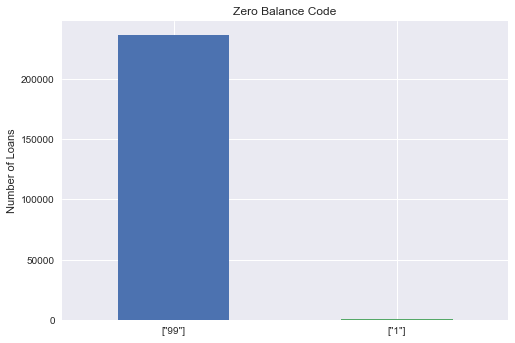

Top  100  counts:  
 ["99"]    236632
["1"]        392
Name: zerobalancecode, dtype: int64


In [231]:
draw(df.zerobalancecode, title='Zero Balance Code', ylabel='Number of Loans', sort = True, n=100)

### Create feature column for zero balance code

In [232]:
def map_zerobalancecode(*args):
    columns = [col for col in args]
    for column in columns:
        if column == code:
            return 1
        else:
            return 0
codes = pd.value_counts(df.zerobalancecode).index.tolist()

for code in codes:
        df['zerobalance_{}'.format(code)] = list(map(map_zerobalancecode, df.zerobalancecode))
        print('Added Column for :   zerobalance_'+code)
df.drop(['zerobalancecode'], axis=1, inplace=True)
df.shape

Added Column for :   zerobalance_["99"]
Added Column for :   zerobalance_["1"]


(237024, 56)

## Add External S&P Experian default index and historical data

In [233]:
df=df.set_index('reportingperiodendingdate')

In [234]:
df1=pd.read_csv(path+'datasets/s&pExperianAutoDefaultIndex.csv', index_col=0)
df=df.join(df1)
df2=pd.read_csv(path+'datasets/experianHistDefaultRates.csv', index_col=0)
df=df.join(df2)

In [235]:
df.head()

,cik,assetnumber,reportingperiodbeginningdate,originationdate,originalloanamount,originalloanterm,originalinterestratepercentage,graceperiodnumber,obligorcreditscore,paymenttoincomepercentage,...,servicingadvancemethod_code_4,zerobalanceeffectivedate_calc,"zerobalance_[""99""]","zerobalance_[""1""]",S&P/Experian Auto Default Index,AutoIndex,BankCardIndex,FirstMortgageIndex,SecondMortgageIndex,CompositeIndex
2017-11-30,1725617,1001536189,2017-11-01,2012-12-31,25124.50,72,3.29,0,812.0,2.66,...,0,0.0,1,0,0.011,1.11,3.28,0.66,1.08,0.89
2017-11-30,1725617,1001536759,2017-11-01,2012-12-31,43257.34,72,3.29,1,817.0,3.99,...,0,0.0,1,0,0.011,1.11,3.28,0.66,1.08,0.89
2017-11-30,1725617,1001536970,2017-11-01,2012-12-31,56917.54,72,3.29,1,818.0,6.97,...,0,0.0,1,0,0.011,1.11,3.28,0.66,1.08,0.89
2017-11-30,1725617,1001537061,2017-11-01,2012-12-31,42003.57,72,3.29,1,791.0,2.96,...,0,0.0,1,0,0.011,1.11,3.28,0.66,1.08,0.89
2017-11-30,1725617,1001537088,2017-11-01,2012-12-31,77217.85,72,3.29,1,712.0,10.37,...,0,0.0,1,0,0.011,1.11,3.28,0.66,1.08,0.89


In [236]:
df.drop(['cik', 'assetnumber', 'reportingperiodbeginningdate','originationdate'], axis=1, inplace=True)
df.shape        

(237024, 57)

# Clean data

In [ ]:
# change columns to lower case and remove prefix to enable pandas to work
#column_list=[x.lower() for x in (column_list)]
#df.columns=df.columns.str.replace('abs_loan.','')
# convert objects to numeric
#df=df.convert_objects(convert_numeric=True)

# Check for null

In [237]:
df.isnull().values.any()

False

# Loan Statistics

In [238]:
df.describe()

,originalloanamount,originalloanterm,originalinterestratepercentage,graceperiodnumber,obligorcreditscore,paymenttoincomepercentage,reportingperiodbeginningloanbalanceamount,nextreportingperiodpaymentamountdue,reportingperiodinterestratepercentage,nextinterestratepercentage,...,servicingadvancemethod_code_4,zerobalanceeffectivedate_calc,"zerobalance_[""99""]","zerobalance_[""1""]",S&P/Experian Auto Default Index,AutoIndex,BankCardIndex,FirstMortgageIndex,SecondMortgageIndex,CompositeIndex
count,237024.000000,237024.000000,237024.000000,237024.000000,237024.000000,237024.000000,237024.000000,237024.000000,237024.000000,237024.000000,...,237024.000000,237024.000000,237024.000000,237024.000000,237024.000000,237024.000000,237024.000000,237024.000000,237024.000000,237024.000000
mean,33909.358165,61.554290,2.407266,0.713177,779.159418,6.201160,25203.323470,19.985428,2.444693,2.444693,...,0.024103,0.853129,0.998346,0.001654,0.010082,1.031696,3.675187,0.681414,0.746566,0.917795
std,16340.725537,9.900714,1.522248,0.452279,65.958821,5.392042,14462.449491,135.513538,1.576585,1.576585,...,0.153369,25.594729,0.040634,0.040634,0.000669,0.065073,0.233343,0.022111,0.202012,0.025826
min,3741.290000,16.000000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.009300,0.930000,3.280000,0.660000,0.570000,0.890000
25%,22872.930000,60.000000,1.000000,0.000000,728.000000,3.020000,15384.842500,0.000000,1.003800,1.003800,...,0.000000,0.000000,1.000000,0.000000,0.009300,0.990000,3.640000,0.660000,0.590000,0.890000
50%,30947.875000,60.000000,1.900000,1.000000,785.000000,4.970000,22831.470000,0.000000,1.917800,1.917800,...,0.000000,0.000000,1.000000,0.000000,0.009900,0.990000,3.840000,0.680000,0.590000,0.920000
75%,41428.990000,72.000000,2.990000,1.000000,834.000000,7.890000,32147.630000,0.000000,3.031100,3.031100,...,0.000000,0.000000,1.000000,0.000000,0.010500,1.090000,3.860000,0.680000,0.800000,0.920000
max,189984.120000,72.000000,15.140000,1.000000,900.000000,96.950000,180707.380000,13589.950000,16.238300,16.238300,...,1.000000,1916.000000,1.000000,1.000000,0.011000,1.110000,3.860000,0.720000,1.080000,0.960000


## Deliquency Buckets Current Vs Non-Current

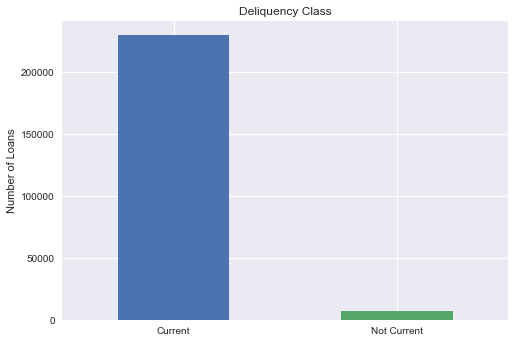

Number of loans Current : 229634     Number of loans Not Current : 7390


In [239]:
LABELS = ('Current', 'Not Current')
count_classes = pd.value_counts(df.currentdelinquencystatus>0, sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.xticks(range(2), LABELS)
plt.title('Deliquency Class')
plt.ylabel("Number of Loans")
plt.show()
print('Number of loans Current :', count_classes[0],'   ', 'Number of loans Not Current :', count_classes[1],)

In [240]:
df.currentdelinquencystatus.describe()

count    237024.000000
mean          0.292717
std           2.934069
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         182.000000
Name: currentdelinquencystatus, dtype: float64

In [241]:
df.currentdelinquencystatus.isna().mean()

0.0

In [242]:
u=pd.value_counts(df.currentdelinquencystatus==''.index) 
if len(u)<2:
    print('No blank current delinquency status')
else: 
    print('Number of loans with blank current delinquency status',':', u[1])
    #print('Dropping ', u[1], 'rows and retaining loans with correct interest paid throughdate')
    #df=df[df.interestpaidthroughdate>'1900-01-01']
df.shape

No blank current delinquency status


(237024, 57)

## Label Creation for Machine Learning

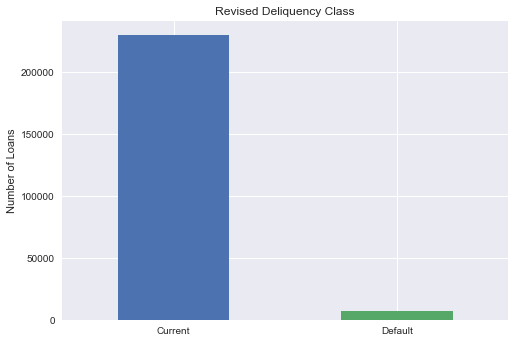

Number of loans Current : 229634     Number of loans Defaulted : 7390


In [243]:
def map_label(*args):
    columns = [col for col in args]
    for column in columns:
        if column > 0:
            return 1
        elif column == 0:
            return 0
        
df['label'] = list(map(map_label, df.currentdelinquencystatus ))

LABELS = ('Current', 'Default')
count_classes = pd.value_counts(df.label, sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.xticks(range(2), LABELS)
plt.title('Revised Deliquency Class')
plt.ylabel("Number of Loans")
plt.show()
print('Number of loans Current :', count_classes[0],'   ', 'Number of loans Defaulted :', count_classes[1],)

### Loan Balance Amount at the End of Reporting Period

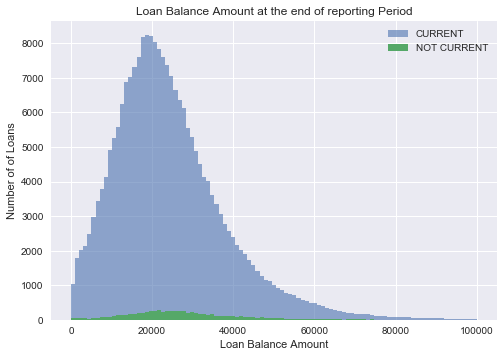

In [244]:
current_df = df[df.label==0]
not_current_df = df[df.label==1]
bins = np.linspace(0, 100000, 100)
plt.hist(current_df.reportingperiodactualendbalanceamount, bins, alpha=0.6, 
         #density=True, 
         label='CURRENT')
plt.hist(not_current_df.reportingperiodactualendbalanceamount, bins, alpha=1, 
         #density=True, 
         label='NOT CURRENT')
plt.legend(loc='upper right')
plt.title("Loan Balance Amount at the end of reporting Period")
plt.xlabel('Loan Balance Amount')
plt.ylabel('Number of of Loans')
plt.show()

### Manual oversampling of default data 

In [ ]:
# #def manual_oversampling(df):
# default=df[df.label==1]
# print('default: ',default.shape)
# b=int((df.shape[0]-default.shape[0])/(default.shape[0]))
# print('copy default data ',b, ' times')
# b=int(b*manualOversamplingFactor)
# print(b)
# for i in range(b):
#     df=df.append(default, ignore_index=True)
# df=df.sample(frac=1).reset_index(drop=True)
# draw(df.label, title='Manual Oversampling -Current Vs Non-Current', ylabel='Number of Loans', sort=True)
# print(df.shape)
# print(pd.value_counts(df.label==1))
# #return df
   

In [ ]:
# #manual_oversampling(df)
# print(pd.value_counts(df.label==1))
# df.shape

In [ ]:
#df.dtypes

### Oversampling with SMOTE

In [ ]:
# from imblearn.over_sampling import SMOTE, ADASYN
# x_train, y_train = SMOTE().fit_resample(x_train, y_train)

In [ ]:
# #Apply SMOTE to create synthetic observations from minority class
# #Source:https://github.com/scikit-learn-contrib/imbalanced-learn
# from imblearn.over_sampling import SMOTE #Over sampling
# sm = SMOTE(ratio='auto',kind='regular')
# X_sampled,y_sampled = sm.fit_sample(X,y.values.ravel())

# #Percentage of fraudlent records in original data
# Source_data_no_fraud_count = len(data[data.Class==0])
# Source_data_fraud_count = len(data[data.Class==1])
# print('Percentage of fraud counts in original dataset:{}%'.format((Source_data_fraud_count*100)/(Source_data_no_fraud_count+Source_data_fraud_count)))

# #Percentage of fraudlent records in sampled data
# Sampled_data_no_fraud_count = len(y_sampled[y_sampled==0])
# Sampled_data_fraud_count = len(y_sampled[y_sampled==1])
# print('Percentage of fraud counts in the new data:{}%'.format((Sampled_data_fraud_count*100)/(Sampled_data_no_fraud_count+Sampled_data_fraud_count)))

### Naive Random Oversampling

In [ ]:
# from imblearn.over_sampling import RandomOverSampler
# ros = RandomOverSampler(random_state=0)
# X_resampled, y_resampled = ros.fit_resample(X, y)
# from collections import Counter
# print(sorted(Counter(y_resampled).items()))

#  Clean up for Machine Learning

In [246]:
df.isnull().any()

originalloanamount                           False
originalloanterm                             False
originalinterestratepercentage               False
graceperiodnumber                            False
obligorcreditscore                           False
paymenttoincomepercentage                    False
reportingperiodbeginningloanbalanceamount    False
nextreportingperiodpaymentamountdue          False
reportingperiodinterestratepercentage        False
nextinterestratepercentage                   False
servicingfeepercentage                       False
servicingflatfeeamount                       False
otherservicerfeeretainedbyservicer           False
otherassesseduncollectedservicerfeeamount    False
scheduledinterestamount                      False
scheduledprincipalamount                     False
otherprincipaladjustmentamount               False
reportingperiodactualendbalanceamount        False
reportingperiodscheduledpaymentamount        False
totalactualamountpaid          

In [247]:
df.isnull().any().sum()

0

In [248]:
pd.value_counts(df.label, dropna=False)

0    229634
1      7390
Name: label, dtype: int64

Dropping NaN rows for the label(current Vs Non-current)

In [249]:
df.label.dropna(inplace=True)

In [250]:
pd.value_counts(df.label, dropna=False)

0    229634
1      7390
Name: label, dtype: int64

In [251]:
pd.value_counts(df.paymenttoincomepercentage, dropna=False).head()

0.00    2301
2.39     405
4.16     395
2.87     394
3.63     392
Name: paymenttoincomepercentage, dtype: int64

Dropping NaN rows for payment to income percentage

In [252]:
df.paymenttoincomepercentage.dropna(inplace=True)

In [253]:
pd.value_counts(df.paymenttoincomepercentage, dropna=False).head()

0.00    2301
2.39     405
4.16     395
2.87     394
3.63     392
Name: paymenttoincomepercentage, dtype: int64

In [254]:
df['servicingflatfeeamount']=df.servicingflatfeeamount.astype('float')
pd.value_counts(df.servicingflatfeeamount, dropna=False) 

0.0    237024
Name: servicingflatfeeamount, dtype: int64

Populating blank servicing flat fee amount with zeros

In [255]:
df.servicingflatfeeamount.fillna(0,inplace=True)

In [256]:
pd.value_counts(df.reportingperiodbeginningloanbalanceamount, dropna=False).head()

0.01        22
10000.00    17
0.04        11
7500.00     11
30000.00     9
Name: reportingperiodbeginningloanbalanceamount, dtype: int64

Populate blank rows of reporting period beginning loan balance amount with zeros

In [257]:
df.reportingperiodbeginningloanbalanceamount.fillna(0, inplace=True)

In [258]:
pd.value_counts(df.reportingperiodbeginningloanbalanceamount, dropna=False).head()

0.01        22
10000.00    17
0.04        11
7500.00     11
30000.00     9
Name: reportingperiodbeginningloanbalanceamount, dtype: int64

In [259]:
pd.value_counts(df.otherservicerfeeretainedbyservicer, dropna=False).head()

0.0    237024
Name: otherservicerfeeretainedbyservicer, dtype: int64

Populate blank other servicer fee retained by servicer with zeros

In [260]:
df.otherservicerfeeretainedbyservicer.fillna(0, inplace=True)

In [261]:
pd.value_counts(df.otherservicerfeeretainedbyservicer, dropna=False).head()

0.0    237024
Name: otherservicerfeeretainedbyservicer, dtype: int64

In [262]:
pd.value_counts(df.serviceradvancedamount, dropna=False).head()

0.00     231311
4.04          6
0.95          6
1.97          6
12.37         5
Name: serviceradvancedamount, dtype: int64

Populate blank servicer advance amount with zeros

In [263]:
df.serviceradvancedamount.fillna(0, inplace=True)

In [264]:
pd.value_counts(df.serviceradvancedamount, dropna=False).head()

0.00     231311
4.04          6
0.95          6
1.97          6
12.37         5
Name: serviceradvancedamount, dtype: int64

In [265]:
df.isnull().any()

originalloanamount                           False
originalloanterm                             False
originalinterestratepercentage               False
graceperiodnumber                            False
obligorcreditscore                           False
paymenttoincomepercentage                    False
reportingperiodbeginningloanbalanceamount    False
nextreportingperiodpaymentamountdue          False
reportingperiodinterestratepercentage        False
nextinterestratepercentage                   False
servicingfeepercentage                       False
servicingflatfeeamount                       False
otherservicerfeeretainedbyservicer           False
otherassesseduncollectedservicerfeeamount    False
scheduledinterestamount                      False
scheduledprincipalamount                     False
otherprincipaladjustmentamount               False
reportingperiodactualendbalanceamount        False
reportingperiodscheduledpaymentamount        False
totalactualamountpaid          

In [266]:
df.fillna(0, inplace=True)

In [267]:
df.isnull().any().sum()

0

In [268]:
df.dropna(inplace=True)

In [269]:
df.shape 

(237024, 58)

In [270]:
df.dtypes

originalloanamount                           float64
originalloanterm                               int64
originalinterestratepercentage               float64
graceperiodnumber                              int64
obligorcreditscore                           float64
paymenttoincomepercentage                    float64
reportingperiodbeginningloanbalanceamount    float64
nextreportingperiodpaymentamountdue          float64
reportingperiodinterestratepercentage        float64
nextinterestratepercentage                   float64
servicingfeepercentage                       float64
servicingflatfeeamount                       float64
otherservicerfeeretainedbyservicer           float64
otherassesseduncollectedservicerfeeamount    float64
scheduledinterestamount                      float64
scheduledprincipalamount                     float64
otherprincipaladjustmentamount               float64
reportingperiodactualendbalanceamount        float64
reportingperiodscheduledpaymentamount        f

# Feature Engineering

In [290]:
corr=df.corr()

In [292]:
corr.to_csv('corr.csv')

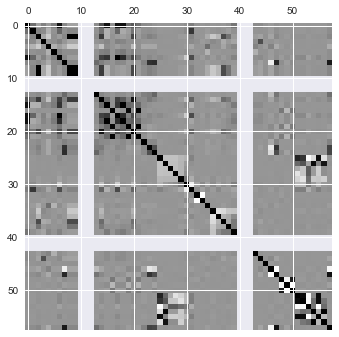

In [293]:
plt.matshow(df.corr())

In [294]:
corr.shape

(58, 58)

In [295]:
corr.isna().mean().sum()

11.379310344827587

In [296]:
corr.fillna(0, inplace=True)

In [297]:
corr.isna().mean().sum()

0.0

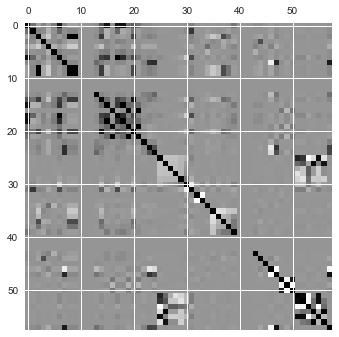

In [298]:
plt.matshow(corr)

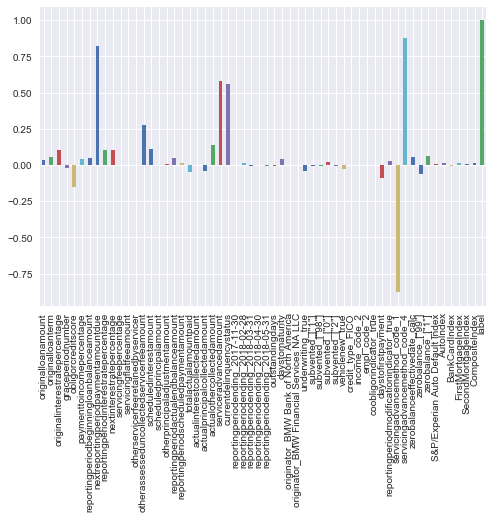

In [300]:
corr.label.plot(kind='bar')

### Save the dataframe

In [ ]:
df.to_csv(path+"datasets/processed_abs_loans_"+str(nrows)+".csv", chunksize=10000)

### Data Analysis

In [ ]:
nrows=250000
path = 'c:/users/ugy1/abs/'
import pandas as pd
df=pd.read_csv(path+'datasets/processed_abs_loan_'+str(nrows)+'.csv', 
               #usecols=use_list, 
               #sep='\t',
               #compression=bz2,
               nrows=nrows,
               low_memory=False, 
              index_col=0, 
               parse_dates=True
              )

In [ ]:
### Preparing data for Machine Learning

In [ ]:
# prepare label for scikit-learn
Y=df.label.values
Y.shape

In [ ]:
# reshape labels for machine learning
#Y=Y.reshape(Y.shape[0],1)
Y.shape

In [ ]:
# prepare input data for scikit-learn
input=df.values
input.shape

In [ ]:
# calculate train/test split
len_train = int(len(input)*train_split)
print(len_train)

In [ ]:
# apply train/test split to labels
y_train = Y[0:len_train]
y_test = Y[len_train:]

In [ ]:
#reshape input data for machine learning
#input=input.reshape(input.shape[0], input.shape[1], 1)
input.shape

In [ ]:
# apply train/test split to input data
x_train = input[0:len_train]
x_test = input[len_train:]
x_train.shape

### Scikit-Learn Scaling

In [ ]:
#from sklearn.preprocessing import MinMaxScaler
# from sklearn.preprocessing import minmax_scale
# from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import StandardScaler
# from sklearn.preprocessing import RobustScaler
# from sklearn.preprocessing import Normalizer
# from sklearn.preprocessing import QuantileTransformer
# from sklearn.preprocessing import PowerTransformer

In [ ]:
x_scaler=StandardScaler()
x_train = x_scaler.fit_transform(x_train)
x_test = x_scaler.fit_transform(x_test)

### Keras Scaling - Normalize

In [ ]:
# x_train_keras_scaled = keras.utils.normalize(x_train, axis=-1, order=2)
# x_test_keras_scaled = keras.utils.normalize(x_test, axis=-1, order=2)
# x_train_keras_scaled.shape

### Linear Support Vector Machine Algorithm

Linear Support Vector Classification.
Similar to SVC with parameter kernel=’linear’, but implemented in terms of liblinear rather than libsvm, so it has more flexibility in the choice of penalties and loss functions and should scale better to large numbers of samples.
This class supports both dense and sparse input and the multiclass support is handled according to a one-vs-the-rest scheme.

In [ ]:
# from sklearn import svm, neighbors
# lsvc=svm.LinearSVC()
# clf_lsvc=lsvc.fit(x_train, y_train)
# confidence_lsvc=clf_lsvc.score(x_test, y_test)

### K-Nearest Neighbors Algorithm

In [ ]:
# knn=neighbors.KNeighborsClassifier(n_neighbors=10, n_jobs=-1)
# clf_knn=knn.fit(x_train, y_train)
# confidence_knn=clf_knn.score(x_test, y_test)

### Random Forest Tree Algorithm

Random forests or random decision forests are an ensemble learning method for classification, regression and other tasks, that operate by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees. Random decision forests correct for decision trees' habit of overfitting to their training set

In [ ]:
rfor=RandomForestClassifier()
clf_rfor = rfor.fit(x_train, y_train)
confidence_rfor=clf_rfor.score(x_test, y_test)

### Logistic Regression Algorithm

In [ ]:
# lr = LogisticRegression(solver='lbfgs')
# clf_lr = lr.fit(x_train, y_train)
# confidence_lr=clf_lr.score(x_test, y_test)

### Gaussian Naive Bayes Algorithm

In [ ]:
# from sklearn.naive_bayes import GaussianNB
# gnb = GaussianNB()
# clf_gnb = gnb.fit(x_train, y_train)
# confidence_gnb=clf_gnb.score(x_test, y_test)

### Deep Learning - GRU

In [ ]:

# model = keras.Sequential()
# model.add(keras.layers.GRU(128, activation='relu',  
#                            kernel_regularizer=regularizers.l2(0.01), 
#                            input_shape=(x_train_keras_scaled.shape[1:]), 
#                            return_sequences=True))
# model.add(keras.layers.Dropout(0.3))

# model.add(keras.layers.GRU(64, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
# model.add(keras.layers.Dropout(0.2))

# model.add(keras.layers.Dense(32, activation='relu',  kernel_regularizer=regularizers.l2(0.01)))
# model.add(keras.layers.Dropout(0.3))

# model.add(keras.layers.Dense(2, activation='softmax'))

# optimizer = tf.keras.optimizers.Adam(lr=1e-3, decay=1e-6)
# model.summary()

### Model Configuration

In [ ]:
#save the best model
#keras.callbacks.Callback()
# checkPoint = ModelCheckpoint(filepath = path+'model/'+name+'.h5',
#                             save_best_only = True,
#                             verbose=0)
# tensorboard = TensorBoard(log_dir=path+'logs/{}'.format(name),
#                           histogram_freq=0,
#                           batch_size=32,
#                           write_graph=True,
#                           write_images=False)
# history = keras.callbacks.History()

### Train the Model

In [ ]:
# model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# model.fit(x_train, y_train, epochs=epochs, validation_data=(x_test_keras_scaled, y_test), batch_size=254, 
#         # callbacks = [
#    # baseLogger,
#     #history,
#     #tensorboard
#     #learningRateScheduler,
#     #reduceLROnPlateau
#      #    ], 
#           shuffle=False
# )


### Save the Model

In [ ]:
# model.save(path+'model/'+name+'.h5')

In [ ]:
# test_loss, test_acc = model.evaluate(x_test_keras_scaled, y_test)
# print('Test Loss : ',test_loss,' ','Test Accuracy : ', test_acc)

In [ ]:
# y_pred = model.predict_classes(x_test)

In [ ]:
#print(y_pred)

In [ ]:
#len(y_pred)

In [ ]:
# np.count_nonzero(y_pred)

In [ ]:
# np.count_nonzero(y_test)

### Load Saved Model

In [ ]:
#saved_model = load_model(path+'model/ABS_Keras-GRU254GRU128D32D2-adam1540234475.h5')

In [ ]:
# test_loss, test_acc = saved_model.evaluate(x_test_keras_scaled, y_test)
# print('Test Loss : ',test_loss,' ','Test Accuracy : ', test_acc)

### Predict Classes

In [ ]:
x_pred = x_test

In [ ]:
#prediction_gru = model.predict_classes(x_pred)
# prediction_lsvc = clf_lsvc.predict(x_pred)
# prediction_knn = clf_knn.predict(x_pred)
prediction_rfor = clf_rfor.predict(x_pred)
# prediction_lr = clf_lr.predict(x_pred)
# prediction_gnb = clf_gnb.predict(x_pred)

In [ ]:
predictions = [
  # prediction_gru,
#     prediction_lsvc,
#     prediction_knn,
    prediction_rfor,
#     prediction_lr,
#     prediction_gnb 
]

### Confusion Matrix

In [ ]:
class_names = ['Current', 'Non-Current']

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

for prediction in predictions:
        print('ROC_AUC_SCORE ; ', roc_auc_score(y_test, prediction))
        # Compute confusion matrix
        cnf_matrix = confusion_matrix(y_test, prediction)
        np.set_printoptions(precision=2)

        # Plot non-normalized confusion matrix
        plt.figure()
        plot_confusion_matrix(cnf_matrix, classes=class_names,
                          title= 'Confusion matrix, without normalization')

        # Plot normalized confusion matrix
        plt.figure()
        plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=False,
                          title='Normalized confusion matrix')

        plt.show()

In [ ]:
# fpr, tpr, thresholds = metrics.roc_curve(y_test, prediction, pos_label=2)
# metrics.auc(fpr, tpr)

In [ ]:
#1. find any string which has no numbers 

#2. find only numbers r'^([0-9]*)$'

#3. find only blanks(empty strings) r'^(\s+)$'

In [ ]:
#at least one Nan in a row
# df1=df[df.isnull().any(axis=1)]
# df.isna()
# df.notna()
# df.loc[:,df.isna().any]

In [ ]:
# #replace NaN with zero
# df.fillna(0, inplace=True)